# Заведение общепита в Москве: открыть нельзя проигнорировать.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Общее-описание-проекта-и-исходные-данные." data-toc-modified-id="Общее-описание-проекта-и-исходные-данные.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Общее описание проекта и исходные данные.</a></span></li><li><span><a href="#Часть-1.-Проверка-и-предобработка-данных." data-toc-modified-id="Часть-1.-Проверка-и-предобработка-данных.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Часть 1. Проверка и предобработка данных.</a></span></li><li><span><a href="#Часть-2.-Изучение-данных." data-toc-modified-id="Часть-2.-Изучение-данных.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Часть 2. Изучение данных.</a></span><ul class="toc-item"><li><span><a href="#Категории-заведений." data-toc-modified-id="Категории-заведений.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Категории заведений.</a></span></li><li><span><a href="#Количество-посадочных-мест." data-toc-modified-id="Количество-посадочных-мест.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Количество посадочных мест.</a></span></li><li><span><a href="#Сетевые-заведения." data-toc-modified-id="Сетевые-заведения.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Сетевые заведения.</a></span></li><li><span><a href="#Административные-округа." data-toc-modified-id="Административные-округа.-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Административные округа.</a></span></li><li><span><a href="#Рейтинги-заведений." data-toc-modified-id="Рейтинги-заведений.-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Рейтинги заведений.</a></span></li><li><span><a href="#Распределение-заведений-по-улицам." data-toc-modified-id="Распределение-заведений-по-улицам.-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Распределение заведений по улицам.</a></span></li><li><span><a href="#Средний-чек." data-toc-modified-id="Средний-чек.-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Средний чек.</a></span></li><li><span><a href="#Топ-100-и-Антитоп-100-заведений-по-рейтингам." data-toc-modified-id="Топ-100-и-Антитоп-100-заведений-по-рейтингам.-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Топ-100 и Антитоп-100 заведений по рейтингам.</a></span></li></ul></li><li><span><a href="#Часть-3.-Открытие-кофейни." data-toc-modified-id="Часть-3.-Открытие-кофейни.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Часть 3. Открытие кофейни.</a></span><ul class="toc-item"><li><span><a href="#Расположение-кофеен." data-toc-modified-id="Расположение-кофеен.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Расположение кофеен.</a></span></li><li><span><a href="#Режим-работы-кофеен." data-toc-modified-id="Режим-работы-кофеен.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Режим работы кофеен.</a></span></li><li><span><a href="#Рейтинги,-цены-и-размеры-кофеен." data-toc-modified-id="Рейтинги,-цены-и-размеры-кофеен.-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Рейтинги, цены и размеры кофеен.</a></span></li></ul></li><li><span><a href="#Общие-выводы." data-toc-modified-id="Общие-выводы.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общие выводы.</a></span></li></ul></div>

## Общее описание проекта и исходные данные.

Исследовали рынок общественного питания города Москвы:
- категории заведений;
- расположение заведений;
- особенности ценообразования и рейтинги заведений;
- иные особенности: режим работы, размеры заведений и пр.

Исследование выполнено на основе данных публичных сервисов на лето 2022 года.

In [94]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import math as mth
import folium
from folium import Map, Marker, Choropleth
from folium.plugins import MarkerCluster
from folium.features import CustomIcon
import json

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
#общий стиль визуализации
sns.set_style("whitegrid")

---

## Часть 1. Проверка и предобработка данных.

In [5]:
data.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


Форматы **соответствуют содержанию**, вносить изменения не нужно.

In [7]:
x = data['name'].count()
print(f'В нашем распоряжении данные о {x} заведениях.')

В нашем распоряжении данные о 8406 заведениях.


In [8]:
data.isna().sum()

name                    0
category                0
address                 0
district                0
hours                 536
lat                     0
lng                     0
rating                  0
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
chain                   0
seats                3611
dtype: int64

In [9]:
data.isna().mean().round(4).to_frame().sort_values(by=0).style.format('{:.2%}').background_gradient(cmap='Blues')

,0
name,0.00%
category,0.00%
address,0.00%
district,0.00%
lat,0.00%
lng,0.00%
rating,0.00%
chain,0.00%
hours,6.38%
seats,42.96%


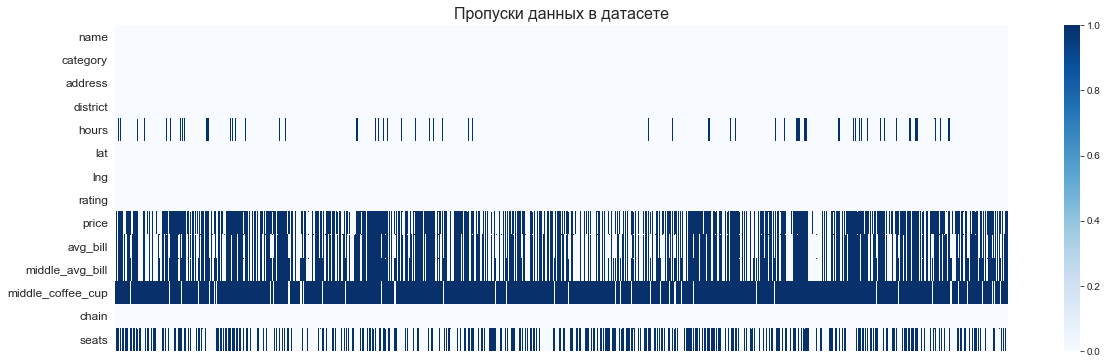

In [10]:
plt.figure(figsize=(20,6))
sns.heatmap(data.isna().transpose(), cmap='Blues', xticklabels=False)
plt.tick_params(labelsize=12)
plt.title('Пропуски данных в датасете', fontsize=16)
plt.show()

Как видно, в сете есть пропуски. Они в основном содержатся в дополнительных признаках заведений: ценовая категория, средний чек, количество посадочных мест и пр. Пропуски, вероятно, не касаются каких-то конкретных видов заведений, равномерно распределены по сету.

Наименее полные данные о средней цене чашки кофе, что объяснимо: информация весьма специфичная, возможно, не во всех заведениях подают кофе.

**Обработали пропуски:**
- `hours` -- оставили без изменений, так как не обладаем иной информацией, замены нецелесообразны; 
- `price` -- категориальная переменная, заменили на `unknown`, чтобы не искажать дальнейшие группировки;
- `avg_bill` -- оставили без изменений, так как не обладаем иной информацией, замены нецелесообразны;
- `middle_avg_bill` -- оставили без изменений, так как не обладаем иной информацией, замены нецелесообразны;
- `middle_coffee_cup` -- оставили без изменений, так как не обладаем иной информацией, замены нецелесообразны;
- `seats` -- оставили без изменений, так как не обладаем иной информацией, замены нецелесообразны.

In [11]:
data['price'] = data['price'].fillna('unknown')

Создали столбец `street` с названиями улиц из столбца с адресом.

In [12]:
data['street'] = data['address'].str.split(',').str[1]

In [13]:
data['street'].isna().sum()

0

Все значения в `street` заполнены.

Создали столбец `is_24/7` с обозначением, что заведение работает ежедневно и круглосуточно (24/7):
- логическое значение `True`, если заведение работает ежедневно и круглосуточно;
- логическое значение `False`, в противоположном случае.

In [14]:
data['is_24/7'] = False
data.loc[data['hours'] == 'ежедневно, круглосуточно', 'is_24/7'] = True

In [15]:
data['is_24/7'].isna().sum()

0

Все значения в `is_24/7` заполнены.

**Проверили на дубликаты.**

In [16]:
#по всему сету
data.duplicated().sum()

0

In [17]:
data['name_low'] = data['name'].str.lower()

In [18]:
#по названию и адресу
data[['name_low', 'address']].duplicated().sum()

3

In [19]:
data.drop_duplicates(subset=['name_low', 'address'], keep='first', inplace=True)
data[['name_low', 'address']].duplicated().sum()

0

In [20]:
data = data.drop(columns='name_low')

Проверили на аномалии в данных.

In [21]:
data['name'].value_counts().head(10)

Кафе                189
Шоколадница         120
Домино'с Пицца       76
Додо Пицца           74
One Price Coffee     71
Яндекс Лавка         69
Cofix                65
Prime                50
Хинкальная           44
Шаурма               43
Name: name, dtype: int64

Дубликаты в названиях допустимы: это либо сетевые заведения, либо заведения с одинаковыми общими названиями ("Кафе", "Шаурма" и пр.)

In [22]:
data['category'].value_counts()

кафе               2377
ресторан           2042
кофейня            1413
бар,паб             764
пиццерия            633
быстрое питание     603
столовая            315
булочная            256
Name: category, dtype: int64

In [23]:
data['district'].value_counts()

Центральный административный округ         2242
Северный административный округ             899
Южный административный округ                892
Северо-Восточный административный округ     890
Западный административный округ             850
Восточный административный округ            798
Юго-Восточный административный округ        714
Юго-Западный административный округ         709
Северо-Западный административный округ      409
Name: district, dtype: int64

In [24]:
data['price'].value_counts()

unknown          5088
средние          2117
выше среднего     564
высокие           478
низкие            156
Name: price, dtype: int64

In [25]:
data['chain'].value_counts()

0    5200
1    3203
Name: chain, dtype: int64

Данные **категориальных** переменных **корректны**.

In [26]:
data[['lat', 'lng', 'middle_avg_bill', 'middle_coffee_cup', 'seats']].describe().T

,count,mean,std,min,25%,50%,75%,max
lat,8403.0,55.750096,0.069664,55.573942,55.705019,55.753407,55.795027,55.928943
lng,8403.0,37.608604,0.098583,37.355651,37.538637,37.605260,37.664810,37.874466
middle_avg_bill,3149.0,958.053668,1009.732845,0.000000,375.000000,750.000000,1250.000000,35000.000000
middle_coffee_cup,535.0,174.721495,88.951103,60.000000,124.500000,169.000000,225.000000,1568.000000
seats,4792.0,108.361436,122.841130,0.000000,40.000000,75.000000,140.000000,1288.000000


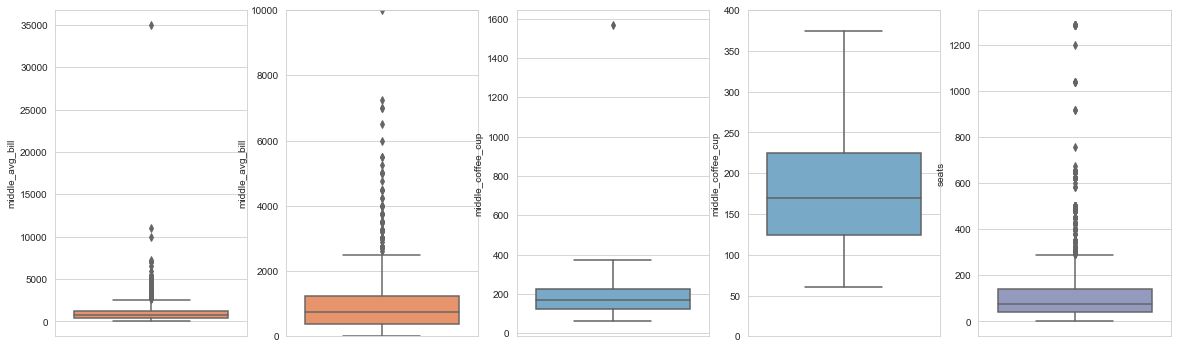

In [27]:
plt.figure(figsize=(20, 6))

ax1 = plt.subplot(1, 5, 1)
ax1 = sns.boxplot(y='middle_avg_bill', data=data, orient='v', palette='OrRd')

ax2 = plt.subplot(1, 5, 2)
ax2 = sns.boxplot(y='middle_avg_bill', data=data, orient='v', palette='OrRd')
ax2.set_ylim(0, 10000)

ax3 = plt.subplot(1, 5, 3)
ax3 = sns.boxplot(y='middle_coffee_cup', data=data, orient='v', palette='Blues')

ax4 = plt.subplot(1, 5, 4)
ax4 = sns.boxplot(y='middle_coffee_cup', data=data, orient='v', palette='Blues')
ax4.set_ylim(0, 400)

ax5 = plt.subplot(1, 5, 5)
ax5 = sns.boxplot(y='seats', data=data, orient='v', palette='BuPu')

plt.show()

Данные непрерывных переменных в целом корректны. Единичные выбросы не влияют на общую картину. Кроме того, это могут быть реальные данные.

**Промежуточные выводы:**
- в нашем распоряжении данные о 8406 заведениях;
- данные соответствуют описанию;
- в данные внесены коррективы: заполнены пропуски в `price`;
- данные дополнены: название улицы `street` и режим работы `is_24/7`;
- данные готовы для исследования.

---

## Часть 2. Изучение данных.

### Категории заведений.

In [28]:
categories = (data.groupby('category', as_index=False).agg(counts=('name', 'count'),
                                                           med_raring=('rating', 'median'),
                                                           med_bill=('middle_avg_bill', 'median'),
                                                           med_coffee=('middle_coffee_cup', 'median'),
                                                           in_chain=('chain', 'sum'),
                                                           all_time=('is_24/7', 'sum'),
                                                           med_seats=('seats', 'median')).
              fillna(0).
              sort_values(by='counts', ascending=False).
              reset_index(drop=True)
             )
categories

,category,counts,med_raring,med_bill,med_coffee,in_chain,all_time,med_seats
0,кафе,2377,4.2,550.0,111.0,779,267,60.0
1,ресторан,2042,4.3,1250.0,0.0,729,135,86.0
2,кофейня,1413,4.3,400.0,170.0,720,59,80.0
3,"бар,паб",764,4.4,1250.0,202.5,168,52,82.0
4,пиццерия,633,4.3,600.0,150.0,330,31,55.0
5,быстрое питание,603,4.2,375.0,140.0,232,150,65.0
6,столовая,315,4.3,300.0,0.0,88,12,75.5
7,булочная,256,4.3,450.0,0.0,157,24,50.0


In [29]:
#для диаграммы
categories_bills = categories.sort_values(by='med_bill', ascending=True)

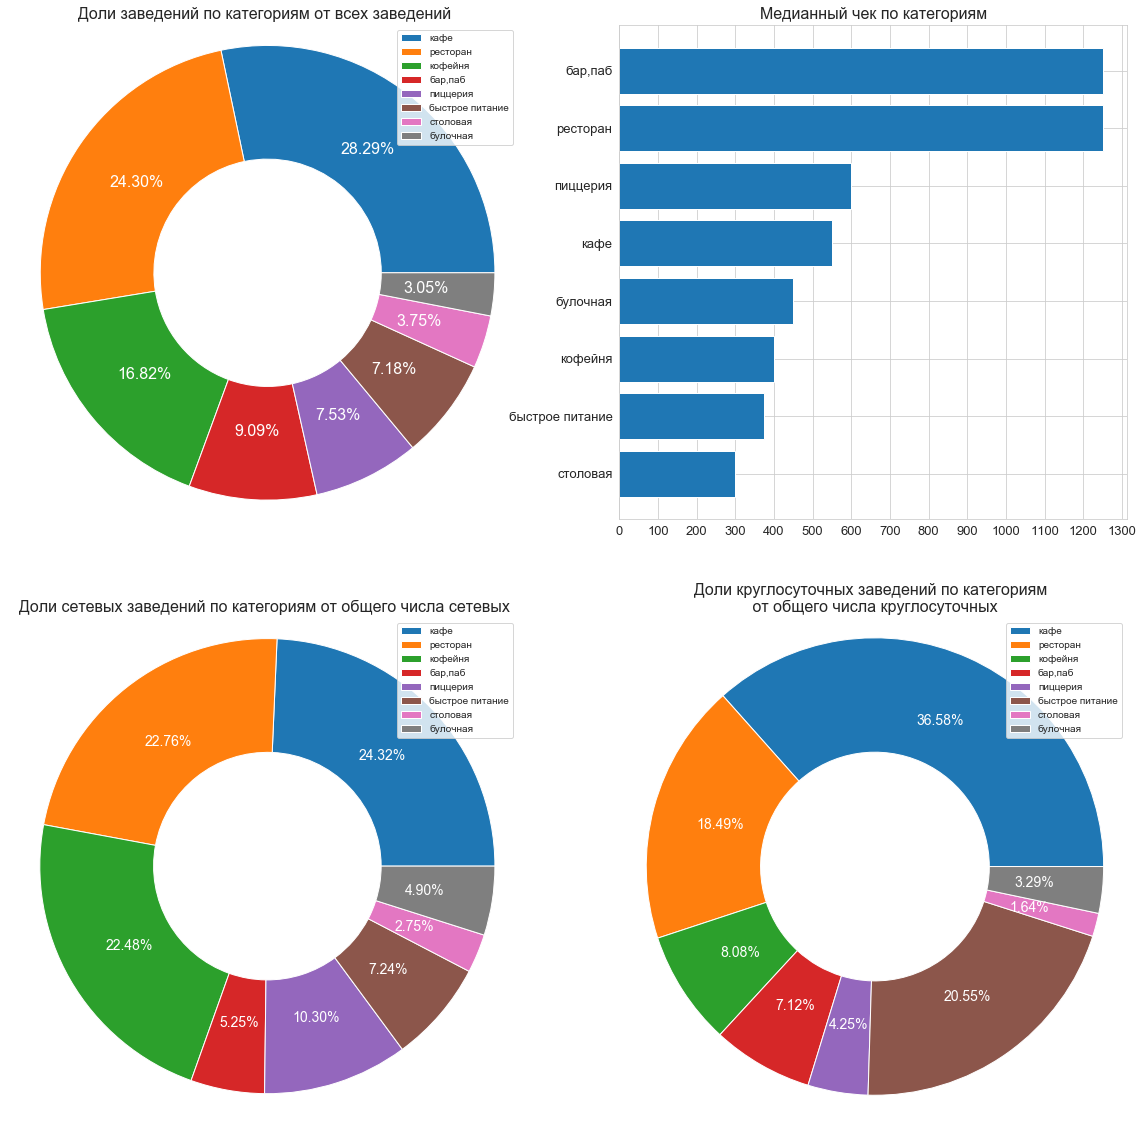

In [30]:
plt.figure(figsize=(20, 20))

ax1 = plt.subplot(2, 2, 1)
x1 = categories['counts']
labels = categories['category']
ax1.pie(x1, autopct='%.2f%%', pctdistance=0.7, wedgeprops=dict(width=0.5), textprops=dict(color='w', fontsize=16))
ax1.axis('equal')
ax1.legend(labels)
ax1.set_title('Доли заведений по категориям от всех заведений', fontsize=16)

ax2 = plt.subplot(2, 2, 2)
height2 = categories_bills['med_bill']
x2 = categories_bills['category']
ax2.barh(x2, height2, height=0.8)
ax2.set_title('Медианный чек по категориям', fontsize=16)
ax2.tick_params(labelsize=13)
ax2.xaxis.set_major_locator(MultipleLocator(base=100))

ax3 = plt.subplot(2, 2, 3)
x3 = categories['in_chain']
ax3.pie(x3, autopct='%.2f%%', pctdistance=0.7, wedgeprops=dict(width=0.5), textprops=dict(color='w', fontsize=14))
ax3.axis('equal')
ax3.legend(labels)
ax3.set_title('Доли сетевых заведений по категориям от общего числа сетевых', fontsize=16)

ax4 = plt.subplot(2, 2, 4)
x4 = categories['all_time']
ax4.pie(x4, autopct='%.2f%%', pctdistance=0.7, wedgeprops=dict(width=0.5), textprops=dict(color='w', fontsize=14))
ax4.axis('equal')
ax4.legend(labels)
ax4.set_title('Доли круглосуточных заведений по категориям \n от общего числа круглосуточных', fontsize=16)

plt.show()

**Наблюдаем:**
- среди категорий лидируют по количеству заведений кафе, рестораны и кофейни;
- в лидерах по медиане чека пабы, бары и ректораны, наименьший чек -- в заведениях бысторого питания и столовых;
- примерно 3/4 всех сетевых заведений -- это кафе, рестораны и кофейни;
- среди всех сетевых наибольшие доли от всех сетевых у кафе, ресторанов и заведений быстрого питания.

### Количество посадочных мест.

In [31]:
data['seats'].describe()

count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

In [32]:
data.query('seats >= 500')['name'].count()

77

Встречаются крупные и очень крупные заведения. Данные из открытых источников показывают, что заведения на 500-1000 мест -- это не аномалия, они реально существуют:

https://iq-banket.ru/halls?filters%5Btypes%5D=1&filters%5Bcapacity%5D=500

https://www.gdebar.ru/articles/banketnye-ploshhadki-na-1000-chelovek-a21437

In [33]:
#для диаграммы
categories_seats = categories.sort_values(by='med_seats', ascending=True)

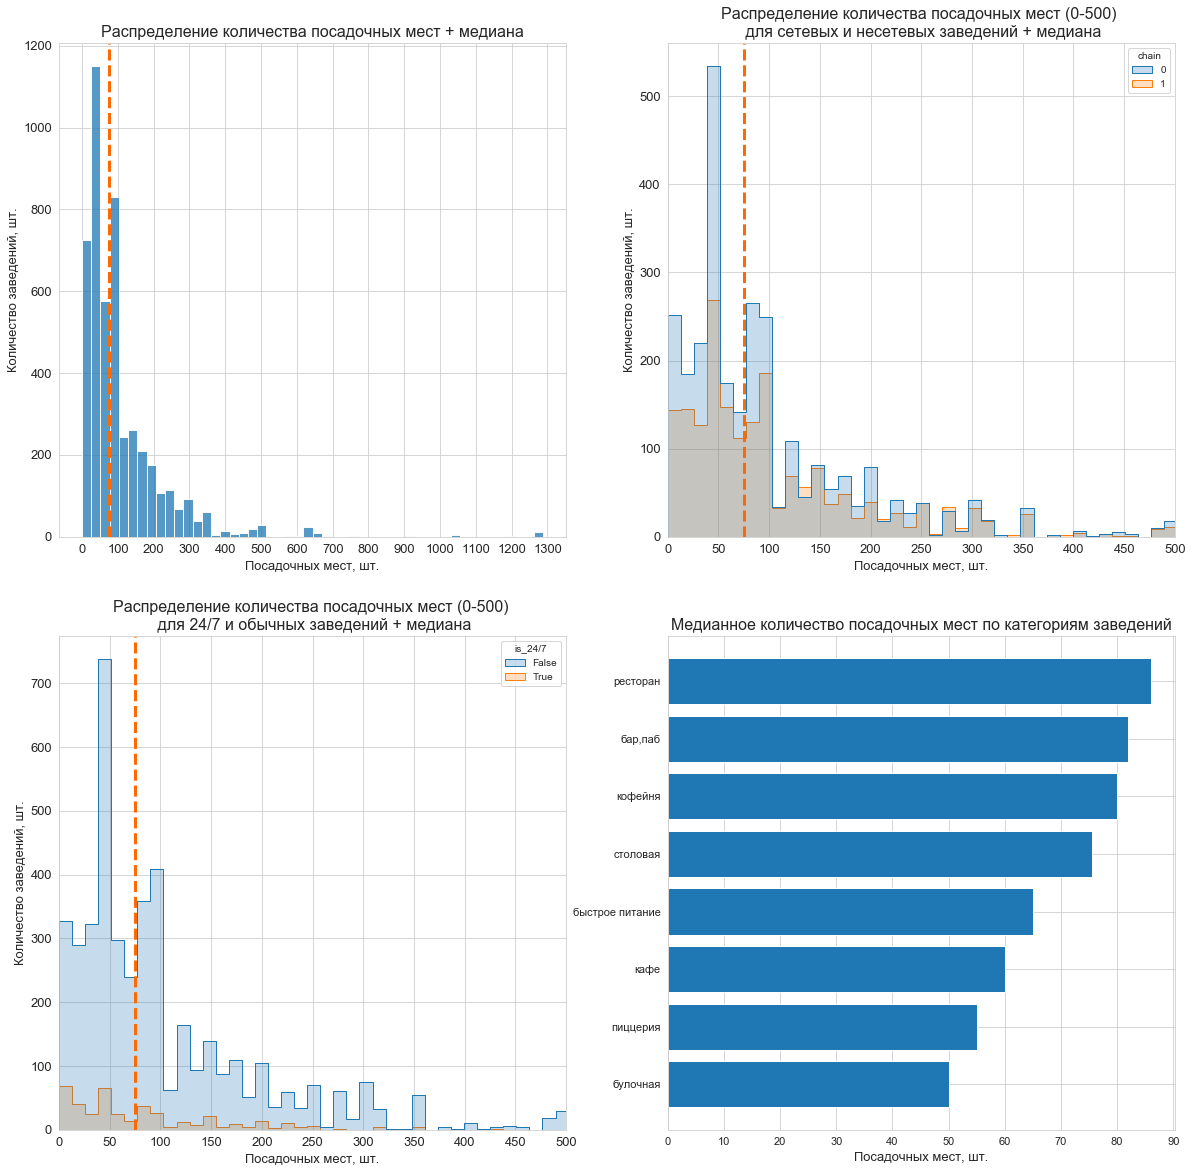

In [34]:
plt.figure(figsize=(20, 20))

ax1 = plt.subplot(2, 2, 1)
ax1 = sns.histplot(x='seats', data=data, bins=50, stat='count')
x1 = data['seats'].median()
ax1.axvline(x=x1, color='#FF6A00', lw=3, linestyle='--')
ax1.set_title('Распределение количества посадочных мест + медиана', fontsize=16)
ax1.tick_params(labelsize=13)
ax1.xaxis.set_major_locator(MultipleLocator(base=100))
ax1.set_xlabel('Посадочных мест, шт.', fontsize=13)
ax1.set_ylabel('Количество заведений, шт.', fontsize=13)

ax2 = plt.subplot(2, 2, 2)
ax2 = sns.histplot(x='seats', data=data, bins=100, stat='count', hue='chain', element='step')
x2 = data['seats'].median()
ax2.axvline(x=x2, color='#FF6A00', lw=3, linestyle='--')
ax2.set_xlim(0, 500)
ax2.set_title('Распределение количества посадочных мест (0-500) \n для сетевых и несетевых заведений + медиана', fontsize=16)
ax2.tick_params(labelsize=13)
ax2.xaxis.set_major_locator(MultipleLocator(base=50))
ax2.set_xlabel('Посадочных мест, шт.', fontsize=13)
ax2.set_ylabel('Количество заведений, шт.', fontsize=13)

ax3 = plt.subplot(2, 2, 3)
ax3 = sns.histplot(x='seats', data=data, bins=100, stat='count', hue='is_24/7', element='step')
x3 = data['seats'].median()
ax3.axvline(x=x3, color='#FF6A00', lw=3, linestyle='--')
ax3.set_xlim(0, 500)
ax3.set_title('Распределение количества посадочных мест (0-500) \n для 24/7 и обычных заведений + медиана', fontsize=16)
ax3.tick_params(labelsize=13)
ax3.xaxis.set_major_locator(MultipleLocator(base=50))
ax3.set_xlabel('Посадочных мест, шт.', fontsize=13)
ax3.set_ylabel('Количество заведений, шт.', fontsize=13)

ax4 = plt.subplot(2, 2, 4)
height4 = categories_seats['med_seats']
x4 = categories_seats['category']
plt.barh(x4, height4, height=0.8)
ax4.tick_params(labelsize=11)
ax4.xaxis.set_major_locator(MultipleLocator(base=10))
ax4.set_title('Медианное количество посадочных мест по категориям заведений', fontsize=16)
ax4.set_xlabel('Посадочных мест, шт.', fontsize=13)

plt.show()

**Наблюдаем:**
- преобладают заведения среднего размера (около 50 мест);
- существуют большие и очень большие заведения (более 1000 мест); вероятно, это ресторнаы с банкетными залами;
- количество мест примерно одинаково распределено для сетевых/не сетевых заведений и круглосуточных/не круглосуточных заведений; отличие наблюдаем только у круглосуточных: количество малых там примерно равно количеству средних;
- медианное значение по категориям: в лидерах рестораны (около 90), замыкают список булочные (около 50 мест).

### Сетевые заведения.

In [35]:
in_chains = data.groupby('chain', as_index=False).agg(counts=('name', 'count'))
in_chains['chain'] = in_chains['chain'].replace({0: 'Не сетевые', 1: 'Сетевые'})
in_chains

,chain,counts
0,Не сетевые,5200
1,Сетевые,3203


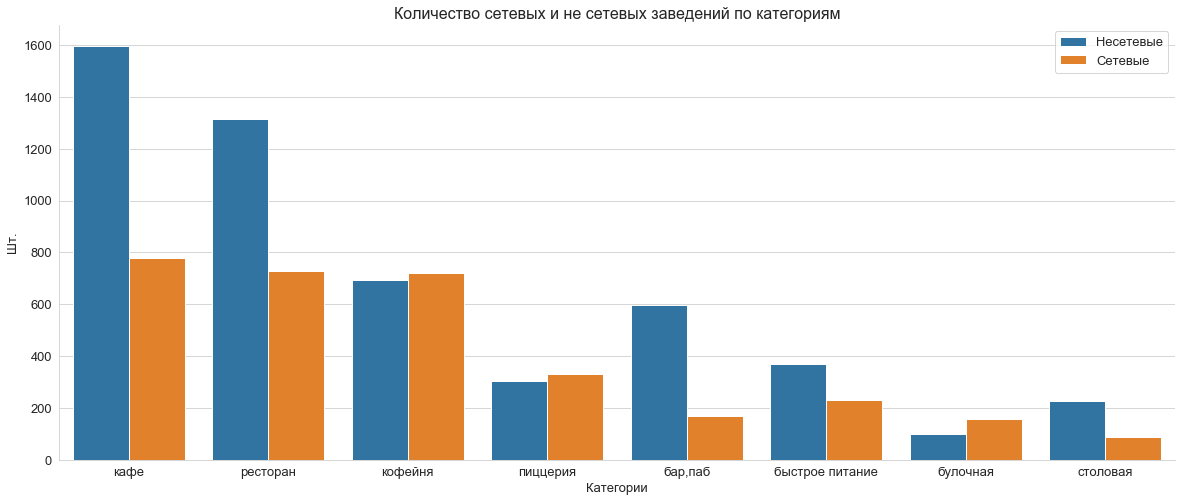

In [36]:
plt.figure(figsize=(20, 8))
sns.countplot(x='category', data=data, hue='chain')
plt.tick_params(labelsize=13)
plt.title('Количество сетевых и не сетевых заведений по категориям', fontsize=16)
plt.xlabel('Категории', fontsize=13)
plt.ylabel('Шт.', fontsize=13)
plt.legend(['Несетевые', 'Сетевые'], fontsize=13)
plt.gca().spines['top'].set_alpha(0.0)    
plt.gca().spines['bottom'].set_alpha(1)
plt.gca().spines['right'].set_alpha(0.0)
plt.gca().spines['left'].set_alpha(1)
plt.show()

In [37]:
categories['chain_share'] = categories['in_chain'] / categories['counts']
#для диаграммы
categories_chains = categories.sort_values(by='chain_share', ascending=False)
categories_chains

,category,counts,med_raring,med_bill,med_coffee,in_chain,all_time,med_seats,chain_share
7,булочная,256,4.3,450.0,0.0,157,24,50.0,0.613281
4,пиццерия,633,4.3,600.0,150.0,330,31,55.0,0.521327
2,кофейня,1413,4.3,400.0,170.0,720,59,80.0,0.509554
5,быстрое питание,603,4.2,375.0,140.0,232,150,65.0,0.384743
1,ресторан,2042,4.3,1250.0,0.0,729,135,86.0,0.357003
0,кафе,2377,4.2,550.0,111.0,779,267,60.0,0.327724
6,столовая,315,4.3,300.0,0.0,88,12,75.5,0.279365
3,"бар,паб",764,4.4,1250.0,202.5,168,52,82.0,0.219895


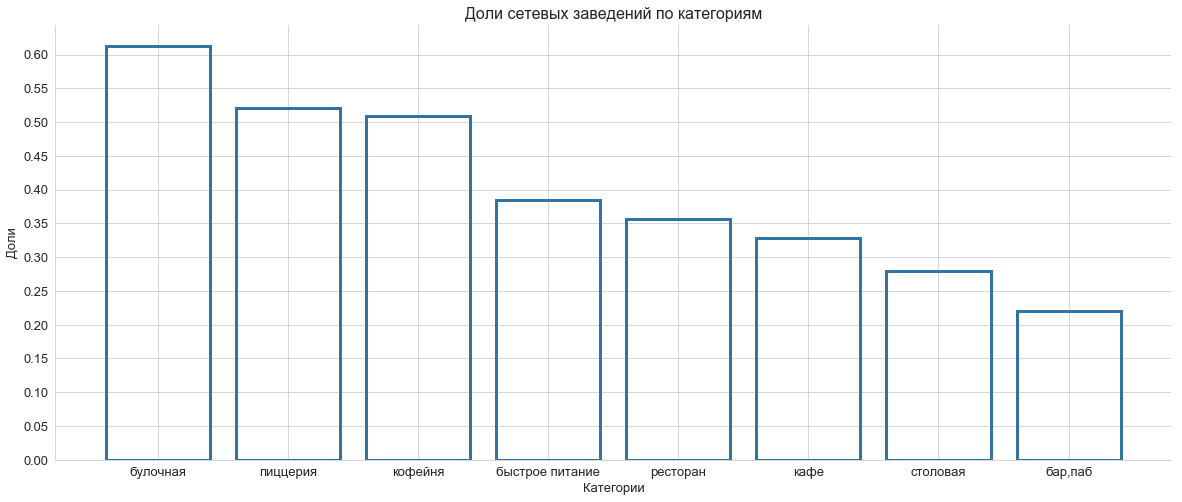

In [38]:
plt.figure(figsize=(20, 8))
ax = plt.subplot()
x = categories_chains['category']
height = categories_chains['chain_share']
plt.bar(x, height, width=0.8, edgecolor='#3274A1', lw=3, linestyle='-', fill=False)
plt.title('Доли сетевых заведений по категориям', fontsize=16)
plt.xlabel('Категории', fontsize=13)
plt.ylabel('Доли', fontsize=13)
plt.tick_params(labelsize=13)
ax.yaxis.set_major_locator(MultipleLocator(base=0.05))
plt.gca().spines['top'].set_alpha(0.0)    
plt.gca().spines['bottom'].set_alpha(1)
plt.gca().spines['right'].set_alpha(0.0)
plt.gca().spines['left'].set_alpha(1)
plt.show()

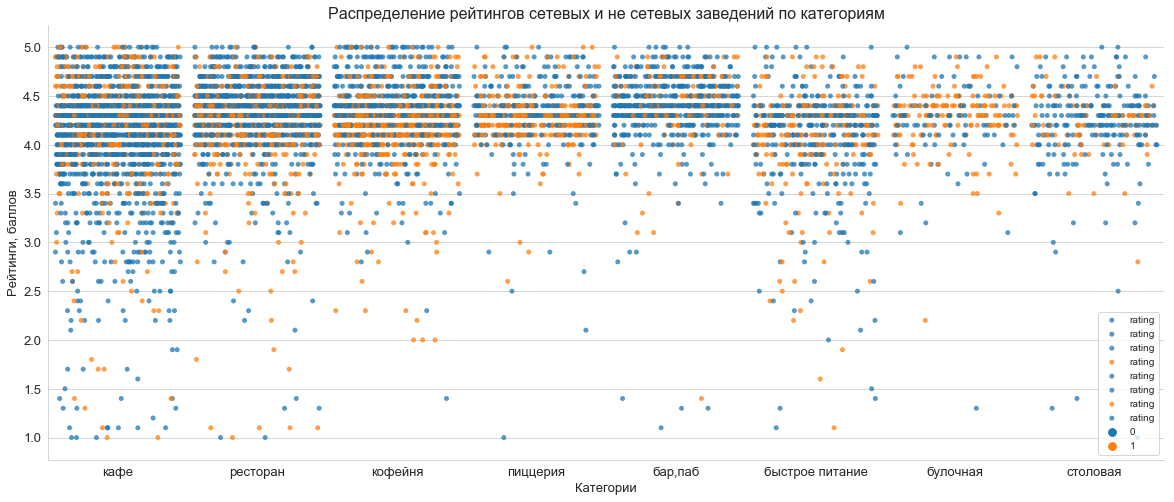

In [39]:
plt.figure(figsize=(20, 8))
sns.stripplot(x='category', y='rating', data=data, hue='chain', jitter=0.45, alpha=0.75, s=5)
plt.tick_params(labelsize=13)
plt.title('Распределение рейтингов сетевых и не сетевых заведений по категориям', fontsize=16)
plt.xlabel('Категории', fontsize=13)
plt.ylabel('Рейтинги, баллов', fontsize=13)
plt.gca().spines['top'].set_alpha(0.0)    
plt.gca().spines['bottom'].set_alpha(1)
plt.gca().spines['right'].set_alpha(0.0)
plt.gca().spines['left'].set_alpha(1)
plt.legend()
plt.show()

**Наблюдаем:**
- преобладают не сетевые заведения: их примерно в 1,5 раза больше сетевых;
- по категориям разделение неравномерное: от примерно 0,2 у баров до примерно 0,6 у булочных;
- сети преобладают в категориях, где технологии легко стандартизируются: в булочных, пиццериях, кофейнях;
- бары, пабы, кафе, напротив, чаще работают "в одиночку";
- рейтинги мало зависят от принадлежности к сети -- это видно из stripplot; исключение в кофейнях: низкие оценки чаще встречаются у сетевиков.

In [40]:
top_chains = (data.query('chain == 1').
              groupby('name', as_index=False).agg(counts=('name', 'count'),
                                                  cats=('category', 'nunique'),
                                                  where=('district', 'nunique'),
                                                  med_rating=('rating', 'median'),
                                                  med_bill=('middle_avg_bill', 'median'),
                                                  med_seats=('seats', 'median')).
              fillna(0).
              sort_values(by='counts', ascending=False).
              reset_index(drop=True).
              head(15)
             )
top_chains

,name,counts,cats,where,med_rating,med_bill,med_seats
0,Шоколадница,120,2,9,4.20,650.0,96.0
1,Домино'с Пицца,76,1,9,4.20,500.0,40.0
2,Додо Пицца,74,1,9,4.30,391.5,52.0
3,One Price Coffee,71,1,9,4.20,0.0,99.5
4,Яндекс Лавка,69,1,9,4.00,0.0,46.0
5,Cofix,65,1,9,4.10,0.0,87.5
6,Prime,50,2,8,4.20,300.0,96.0
7,Хинкальная,44,5,9,4.40,1000.0,60.0
8,КОФЕПОРТ,42,1,8,4.20,0.0,85.0
9,Кулинарная лавка братьев Караваевых,39,1,6,4.40,450.0,70.0


In [41]:
#для диаграммы
top_chains_rot = top_chains.sort_values(by='counts', ascending=True)

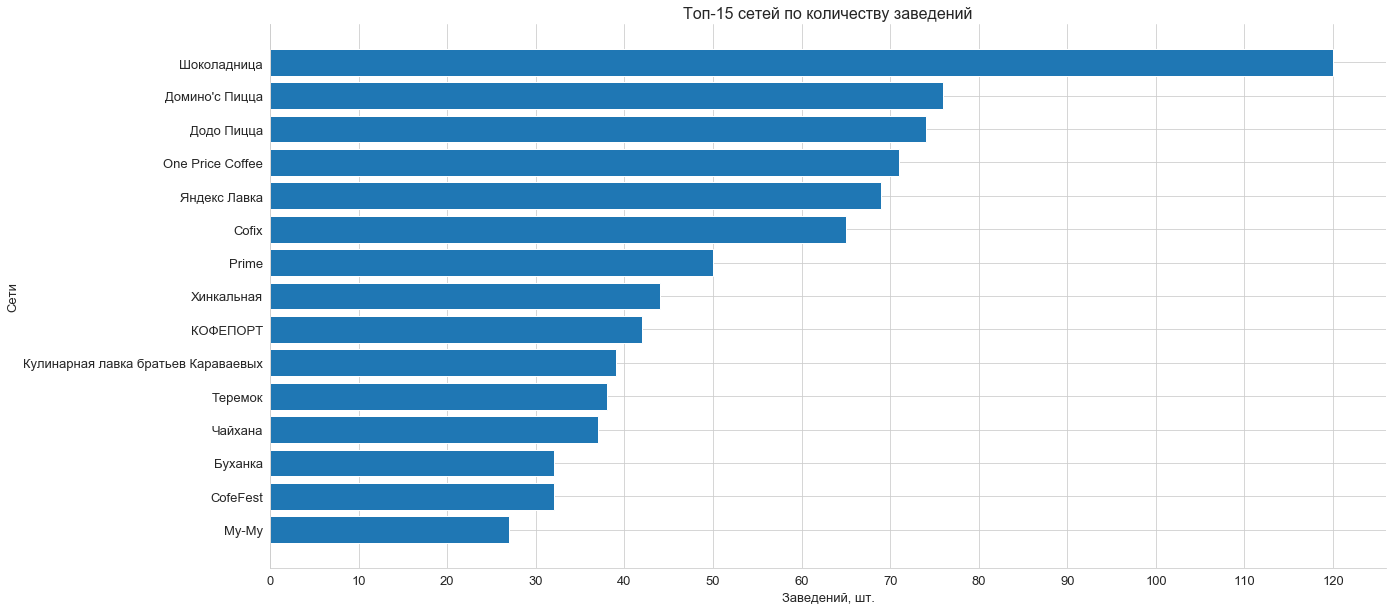

In [42]:
plt.figure(figsize=(20, 10))
ax = plt.subplot()
height = top_chains_rot['counts']
x = top_chains_rot['name']
plt.barh(x, height, height=0.8)
ax.xaxis.set_major_locator(MultipleLocator(base=10))
plt.tick_params(labelsize=13)
plt.title('Топ-15 сетей по количеству заведений', fontsize=16)
plt.xlabel('Заведений, шт.', fontsize=13)
plt.ylabel('Сети', fontsize=13)
plt.gca().spines['top'].set_alpha(0.0)    
plt.gca().spines['bottom'].set_alpha(1)
plt.gca().spines['right'].set_alpha(0.0)
plt.gca().spines['left'].set_alpha(1)
plt.show()

**К какой категории заведений они относятся?**

In [43]:
top_chains_names = top_chains['name'].to_list()
top_chains_rest = (data.query('name in @top_chains_names').
                   groupby('category', as_index=False).agg(counts=('name', 'count')).
                   sort_values(by='counts', ascending=False).
                   reset_index(drop=True)
                  )
top_chains_rest

,category,counts
0,кофейня,336
1,ресторан,186
2,пиццерия,151
3,кафе,100
4,булочная,25
5,быстрое питание,12
6,"бар,паб",4
7,столовая,2


In [44]:
#для диаграммы
top_chains_rot = top_chains_rest.sort_values(by='counts', ascending=True)

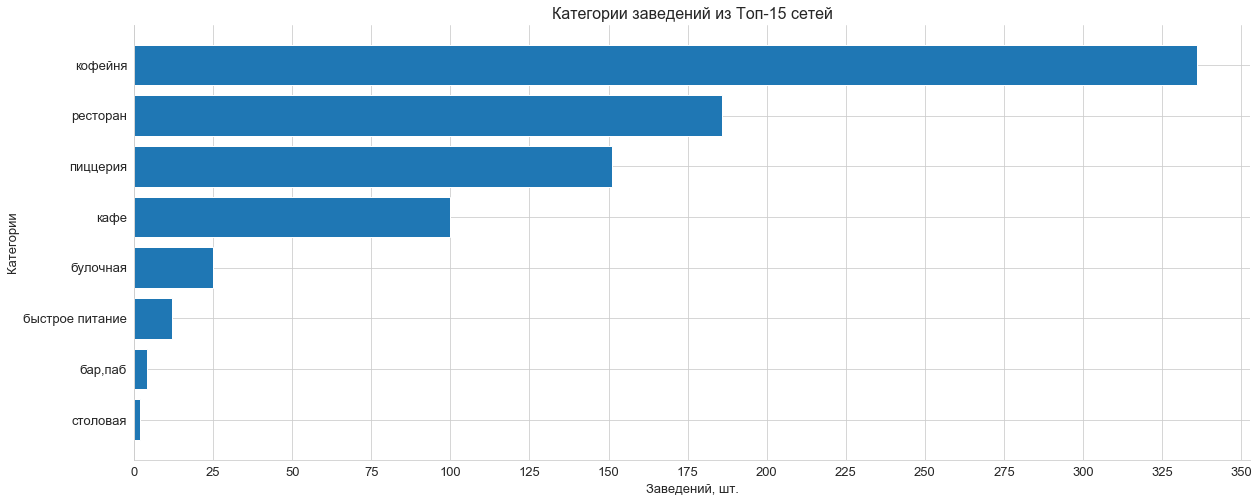

In [45]:
plt.figure(figsize=(20, 8))
ax = plt.subplot()
height = top_chains_rot['counts']
x = top_chains_rot['category']
plt.barh(x, height, height=0.8)
ax.xaxis.set_major_locator(MultipleLocator(base=25))
plt.tick_params(labelsize=13)
plt.title('Категории заведений из Топ-15 сетей', fontsize=16)
plt.xlabel('Заведений, шт.', fontsize=13)
plt.ylabel('Категории', fontsize=13)
plt.gca().spines['top'].set_alpha(0.0)    
plt.gca().spines['bottom'].set_alpha(1)
plt.gca().spines['right'].set_alpha(0.0)
plt.gca().spines['left'].set_alpha(1)
plt.show()

**Наблюдаем:**
- Топ-15 сетей различаются по многим параметрам;
- прежде всего, разнятся объёмы сетей: от 120 заведений у лидера "Шоколадница" до 27 у 15-го места "Му-Му";
- большинство заведений в Топ-15 -- это кофейни;
- рестораны, которые в целом скорее не сетевые, в Топ-15 представлены 186 заведениями: ресторан или не сетевой, или входит в большую сеть, что можно объяснить технологическими особенностями;
- бары и столовые слабо представлены в Топ-15;
- многие сети известны за пределами Москвы;
- Топ-15 объединяет широкая география: они работают по всему городу;
- также сходны медианные рейтинги в районе 4.2-4.3.

### Административные округа.

In [46]:
districts_list = list(data['district'].unique())
districts_count = len(districts_list)

In [47]:
print(f'Имеем данные о {districts_count} округах города Москвы: \n {districts_list}.')

Имеем данные о 9 округах города Москвы: 
 ['Северный административный округ', 'Северо-Восточный административный округ', 'Северо-Западный административный округ', 'Западный административный округ', 'Центральный административный округ', 'Восточный административный округ', 'Юго-Восточный административный округ', 'Южный административный округ', 'Юго-Западный административный округ'].


Не имеем данных об объектах в Зеленоградском округе: http://mosopen.ru/regions.

Вероятно, из-за его расположения: он находится за пределами МКАД.

In [48]:
distr_and_cat = data.pivot_table(index=['district'],
                                 columns=['category'],
                                 values=['name'],
                                 aggfunc={'name': 'count'},
                                 fill_value=0)

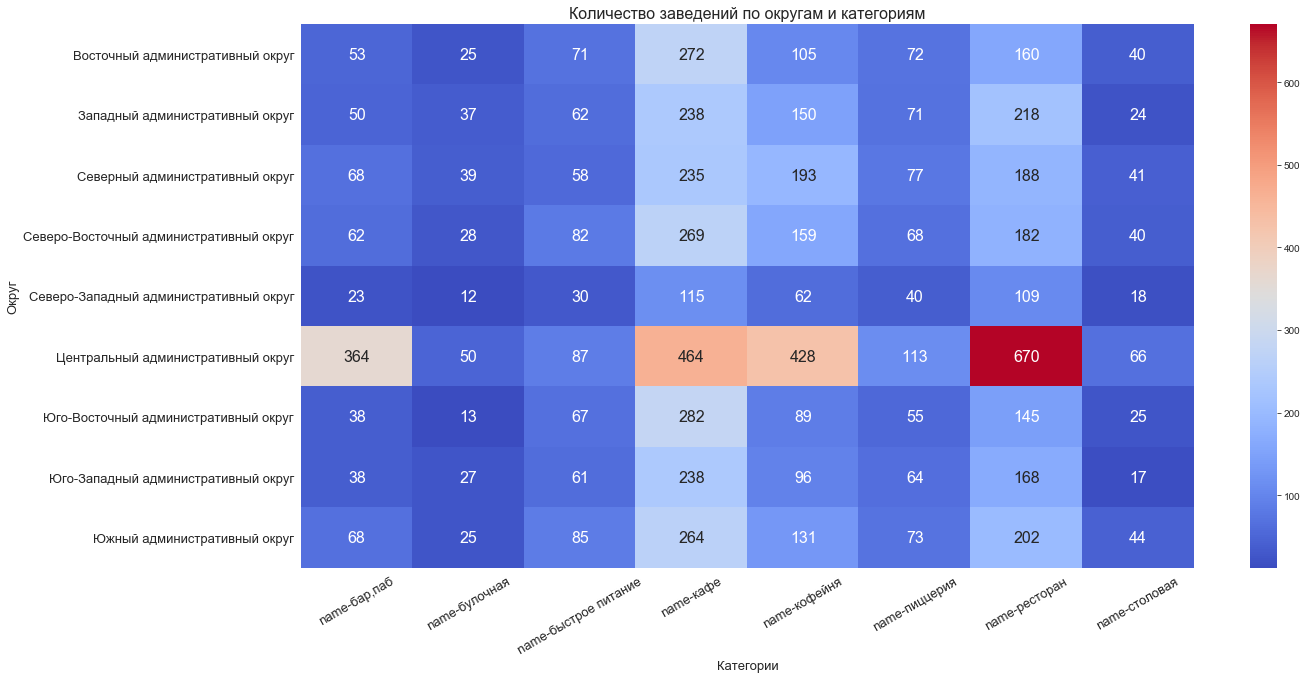

In [49]:
plt.figure(figsize=(20, 10))
sns.heatmap(data=distr_and_cat, cmap='coolwarm', annot=True, fmt='.0f', annot_kws={'fontsize': 16})
plt.tick_params(labelsize=13)
plt.xticks(rotation=30)
plt.title('Количество заведений по округам и категориям', fontsize=16)
plt.xlabel('Категории', fontsize=13)
plt.ylabel('Округ', fontsize=13)
plt.show()

**Наблюдаем:**
- в лидерах по числу заведений ЦАО, САО и ЮАО; при этом ЦАО лидирует с большим отрывом;
- в ЦАО же наибольшее количество ресторанов;
- СЗАО, напротив, в аутсайдерах: всего около 400 заведений.

### Рейтинги заведений.

In [50]:
ratings = (data.groupby('category').agg(avg_raring=('rating', 'mean'),
                                        med_raring=('rating', 'median'),
                                        max_raring=('rating', 'max'),
                                        min_raring=('rating', 'min'),
                                        std_raring=('rating', np.std)).
           fillna(0).
           sort_values(by='avg_raring', ascending=False)
          )
ratings['delta'] = ratings['max_raring'] - ratings['min_raring']
ratings.style.format('{:.2f}')

,avg_raring,med_raring,max_raring,min_raring,std_raring,delta
category,,,,,,
"бар,паб",4.39,4.40,5.00,1.10,0.38,3.90
пиццерия,4.30,4.30,5.00,1.00,0.34,4.00
ресторан,4.29,4.30,5.00,1.00,0.41,4.00
кофейня,4.28,4.30,5.00,1.40,0.37,3.60
булочная,4.27,4.30,5.00,1.30,0.39,3.70
столовая,4.21,4.30,5.00,1.00,0.45,4.00
кафе,4.12,4.20,5.00,1.00,0.57,4.00
быстрое питание,4.05,4.20,5.00,1.10,0.56,3.90


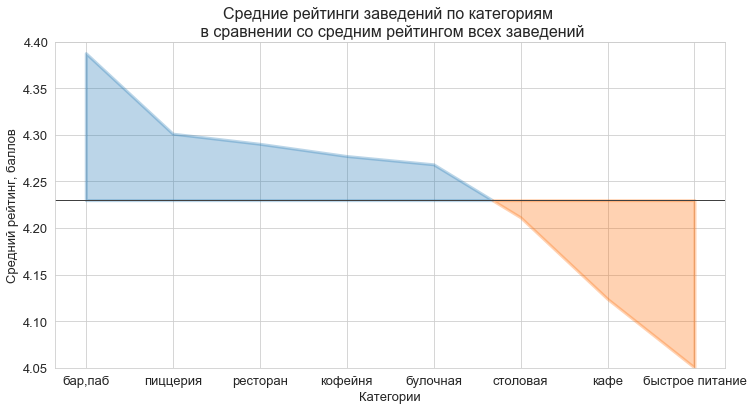

In [51]:
plt.figure(figsize=(12, 6))
x = ratings.index
y1 = ratings['avg_raring']
y2 = data['rating'].mean()
plt.fill_between(x, y1, y2, alpha=0.3, lw=3, color ='#1F77B4',
                where=(y1 > y2), interpolate=True)
plt.fill_between(x, y1, y2, alpha=0.3, lw=3, color ='#FF6A00',
                where=(y1 <= y2), interpolate=True)
plt.axhline(y=data['rating'].mean(), color='#404040', linestyle='-', lw=1)
plt.tick_params(labelsize=13)
plt.ylim(4.05, 4.4)
plt.title('Средние рейтинги заведений по категориям \n в сравнении со средним рейтингом всех заведений', fontsize=16)
plt.xlabel('Категории', fontsize=13)
plt.ylabel('Средний рейтинг, баллов', fontsize=13)
plt.show()

In [52]:
district_rating = data.groupby('district', as_index=False)['rating'].agg('median')
district_rating

,district,rating
0,Восточный административный округ,4.3
1,Западный административный округ,4.3
2,Северный административный округ,4.3
3,Северо-Восточный административный округ,4.2
4,Северо-Западный административный округ,4.3
5,Центральный административный округ,4.4
6,Юго-Восточный административный округ,4.2
7,Юго-Западный административный округ,4.3
8,Южный административный округ,4.3


**Хороплет со средними рейтингами заведений по округам.**

In [53]:
state_geo = 'admin_level_geomap.geojson'
moscow_lat, moscow_lng = 55.751244, 37.618423

In [54]:
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

In [55]:
Choropleth(
    geo_data=state_geo,
    data=district_rating,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='PuBu',
    fill_opacity=0.75,
    legend_name='Медианный рейтинг заведений по районам',
).add_to(m)

![](https://raw.githubusercontent.com/niksan-da/Portfolio/main/Catering_in_Moscow/git_1_1.png)

**Все заведения на карте.**

In [56]:
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)
marker_cluster = MarkerCluster().add_to(m)

In [57]:
def create_clusters(row):
    icon_url = 'https://img.icons8.com/glyph-neue/256/tableware.png'  
    icon = CustomIcon(icon_url, icon_size=(30, 30))
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
        icon=icon,
    ).add_to(marker_cluster)

In [58]:
data.apply(create_clusters, axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
8401    None
8402    None
8403    None
8404    None
8405    None
Length: 8403, dtype: object

![](https://raw.githubusercontent.com/niksan-da/Portfolio/main/Catering_in_Moscow/git_1_3.png)

**Наблюдаем:**
- рейтинги во всех категориях колеблются от 1.0 до 5.0: сказывается субъективность потребителей;
- при этом медианный и средний рейтинги в разных категориях почти идентичны: покупатели не "любят", например, кафе только за то, что они - кафе;
- медианный рейтинг по округам отличается на десятые доли; самый высокий -- в ЦАО, самый низкий -- в СВАО и ЮВАО;
- на карте распределение заведений выглядит равномерным: заведения "размазаны" по всей территории города;
- в большинстве категорий медианный рейтинг выше медианного по городу; в отстающих только столовые, кафе и фаст-фуд.

### Распределение заведений по улицам.

**Топ-15 улиц по количеству заведений.**

In [59]:
data['street'].nunique()

1448

In [60]:
top_streets = data.groupby('street')['name'].count().sort_values(ascending=False).head(15)
top_streets_list = list(top_streets.index)
top_streets_list

[' проспект Мира',
 ' Профсоюзная улица',
 ' проспект Вернадского',
 ' Ленинский проспект',
 ' Ленинградский проспект',
 ' Дмитровское шоссе',
 ' Каширское шоссе',
 ' Варшавское шоссе',
 ' Ленинградское шоссе',
 ' МКАД',
 ' Люблинская улица',
 ' улица Вавилова',
 ' Кутузовский проспект',
 ' улица Миклухо-Маклая',
 ' Пятницкая улица']

In [61]:
top_street_and_cat = (data.query('street in @top_streets_list').
                      pivot_table(index=['street'],
                                  columns=['category'],
                                  values=['name'],
                                  aggfunc={'name': 'count'},
                                  fill_value=0)
                     )

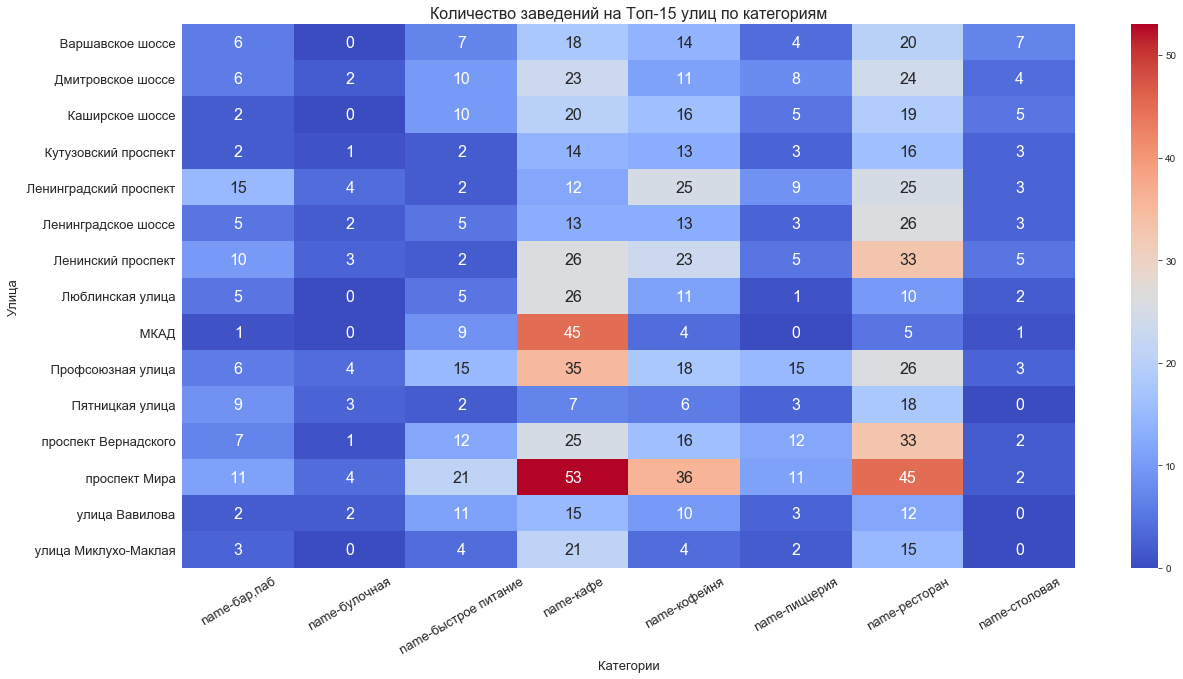

In [62]:
plt.figure(figsize=(20, 10))
sns.heatmap(data=top_street_and_cat, cmap='coolwarm', annot=True, fmt='.0f', annot_kws={'fontsize': 16})
plt.tick_params(labelsize=13)
plt.xticks(rotation=30)
plt.title('Количество заведений на Топ-15 улиц по категориям', fontsize=16)
plt.xlabel('Категории', fontsize=13)
plt.ylabel('Улица', fontsize=13)
plt.show()

**Улицы с единственным заведением.**

In [63]:
just_one_streets = data.groupby('street')['name'].count()
just_one_streets[just_one_streets == 1]
just_one_streets_list = list(just_one_streets.index)

In [64]:
just_one_categories = (data.query('street in @just_one_streets_list').
                       groupby('category', as_index=False).agg(counts=('name', 'count'),
                                                           med_raring=('rating', 'median'),
                                                           med_bill=('middle_avg_bill', 'median'),
                                                           med_coffee=('middle_coffee_cup', 'median'),
                                                           in_chain=('chain', 'sum'),
                                                           all_time=('is_24/7', 'sum'),
                                                           med_seats=('seats', 'median')).
                       fillna(0).
                       sort_values(by='counts', ascending=False).
                       reset_index(drop=True)
                      )
just_one_categories

,category,counts,med_raring,med_bill,med_coffee,in_chain,all_time,med_seats
0,кафе,2377,4.2,550.0,111.0,779,267,60.0
1,ресторан,2042,4.3,1250.0,0.0,729,135,86.0
2,кофейня,1413,4.3,400.0,170.0,720,59,80.0
3,"бар,паб",764,4.4,1250.0,202.5,168,52,82.0
4,пиццерия,633,4.3,600.0,150.0,330,31,55.0
5,быстрое питание,603,4.2,375.0,140.0,232,150,65.0
6,столовая,315,4.3,300.0,0.0,88,12,75.5
7,булочная,256,4.3,450.0,0.0,157,24,50.0


In [65]:
#для диаграммы
just_one_categories_bill = just_one_categories.sort_values(by='med_bill', ascending=True)

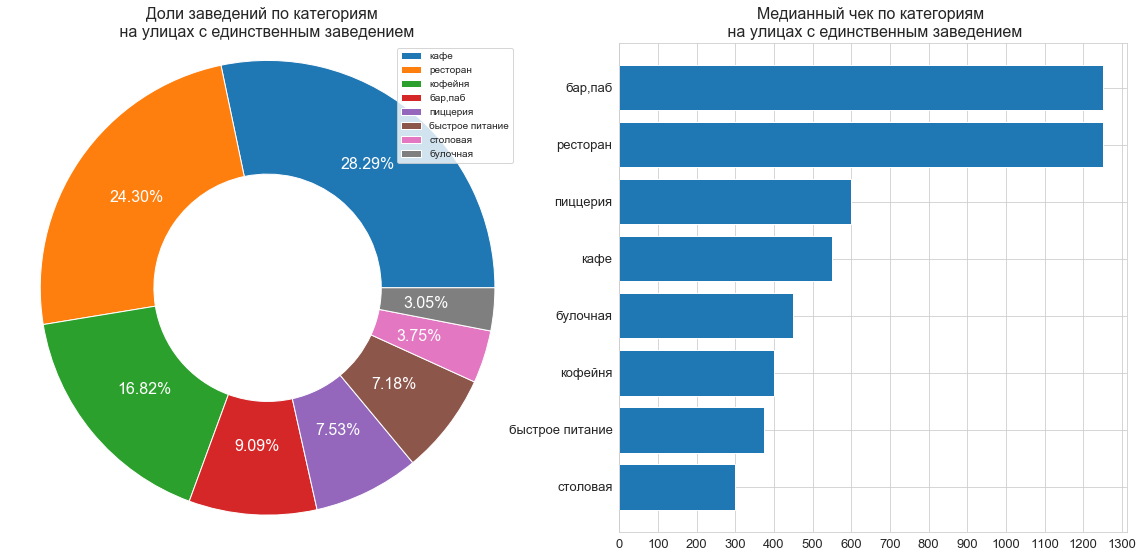

In [66]:
plt.figure(figsize=(20, 9))

ax1 = plt.subplot(1, 2, 1)
x1 = just_one_categories['counts']
ax1.pie(x1, autopct='%.2f%%', pctdistance=0.7, wedgeprops=dict(width=0.5), textprops=dict(color='w', fontsize=16))
labels = just_one_categories['category']
ax1.axis('equal')
ax1.legend(labels)
ax1.set_title('Доли заведений по категориям \n на улицах с единственным заведением', fontsize=16)

ax2 = plt.subplot(1, 2, 2)
height2 = just_one_categories_bill['med_bill']
x2 = just_one_categories_bill['category']
plt.barh(x2, height2, height=0.8)
ax2.set_title('Медианный чек по категориям \n на улицах с единственным заведением', fontsize=16)
ax2.tick_params(labelsize=13)
ax2.xaxis.set_major_locator(MultipleLocator(base=100))

plt.show()

**Наблюдаем:**
- в Топ-15 улиц - большие вылетные магистрали или МКАД;
- улицы с большим трафиком, они несут как "основательные" рестораны, кафе, так и "быстрые" фаст-фуд, кофейни, пиццерии;
- показатели заведений на улицах с единственным объектом походят на общие показатели по городу; такое единственное заведение может находиться, например, на маленькой улице в центре, что обеспечит ему выскою проходимость и конкуренцию с иными такими же заведениями; "один на улице" -- не значит, "монополист на улице".

### Средний чек.

In [67]:
district_bill = (data.groupby('district', as_index=False).agg(med_bill=('middle_avg_bill', 'median'),
                                                              max_bill=('middle_avg_bill', 'max'),
                                                              min_bill=('middle_avg_bill', 'min')).
                 fillna(0).
                 sort_values(by='med_bill', ascending=False)
                )
district_bill['delta'] = district_bill['max_bill'] - district_bill['min_bill']
district_bill.style.format({'med_bill':'{:.1f}', 'max_bill':'{:.2f}', 'min_bill':'{:.2f}', 'delta':'{:.2f}'})

,district,med_bill,max_bill,min_bill,delta
1,Западный административный округ,1000.0,5250.00,50.00,5200.00
5,Центральный административный округ,1000.0,7250.00,0.00,7250.00
4,Северо-Западный административный округ,700.0,2900.00,120.00,2780.00
2,Северный административный округ,650.0,11000.00,130.00,10870.00
7,Юго-Западный административный округ,600.0,2750.00,100.00,2650.00
0,Восточный административный округ,575.0,10000.00,50.00,9950.00
3,Северо-Восточный административный округ,500.0,4500.00,50.00,4450.00
8,Южный административный округ,500.0,35000.00,100.00,34900.00
6,Юго-Восточный административный округ,450.0,3750.00,30.00,3720.00


**Хороплет с медианными значениями чеков.**

In [68]:
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

In [69]:
Choropleth(
    geo_data=state_geo,
    data=district_bill,
    columns=['district', 'med_bill'],
    key_on='feature.name',
    fill_color='PuBu',
    fill_opacity=0.75,
    legend_name='Медианный чек заведений по районам',
).add_to(m)

![](https://raw.githubusercontent.com/niksan-da/Portfolio/main/Catering_in_Moscow/git_1_2.png)

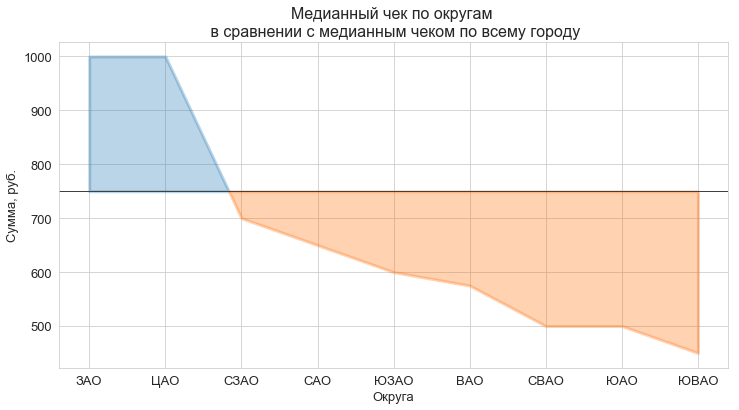

In [70]:
plt.figure(figsize=(12, 6))
x = district_bill['district']
y1 = district_bill['med_bill']
y2 = data['middle_avg_bill'].median()
plt.fill_between(x, y1, y2, alpha=0.3, lw=3, color ='#1F77B4',
                where=(y1 > y2), interpolate=True)
plt.fill_between(x, y1, y2, alpha=0.3, lw=3, color ='#FF6A00',
                where=(y1 <= y2), interpolate=True)
plt.axhline(y=data['middle_avg_bill'].median(), color='#404040', linestyle='-', lw=1)
plt.tick_params(labelsize=13)
x_tiks = ['ЗАО', 'ЦАО', 'СЗАО', 'САО', 'ЮЗАО', 'ВАО', 'СВАО', 'ЮАО', 'ЮВАО']
plt.xticks(np.arange(9), x_tiks)
plt.title('Медианный чек по округам \n в сравнении с медианным чеком по всему городу', fontsize=16)
plt.xlabel('Округа', fontsize=13)
plt.ylabel('Сумма, руб.', fontsize=13)
plt.show()

In [71]:
distr_and_price = data.pivot_table(index=['district'],
                                   columns=['price'],
                                   values=['name'],
                                   aggfunc={'name': 'count'},
                                   fill_value=0)

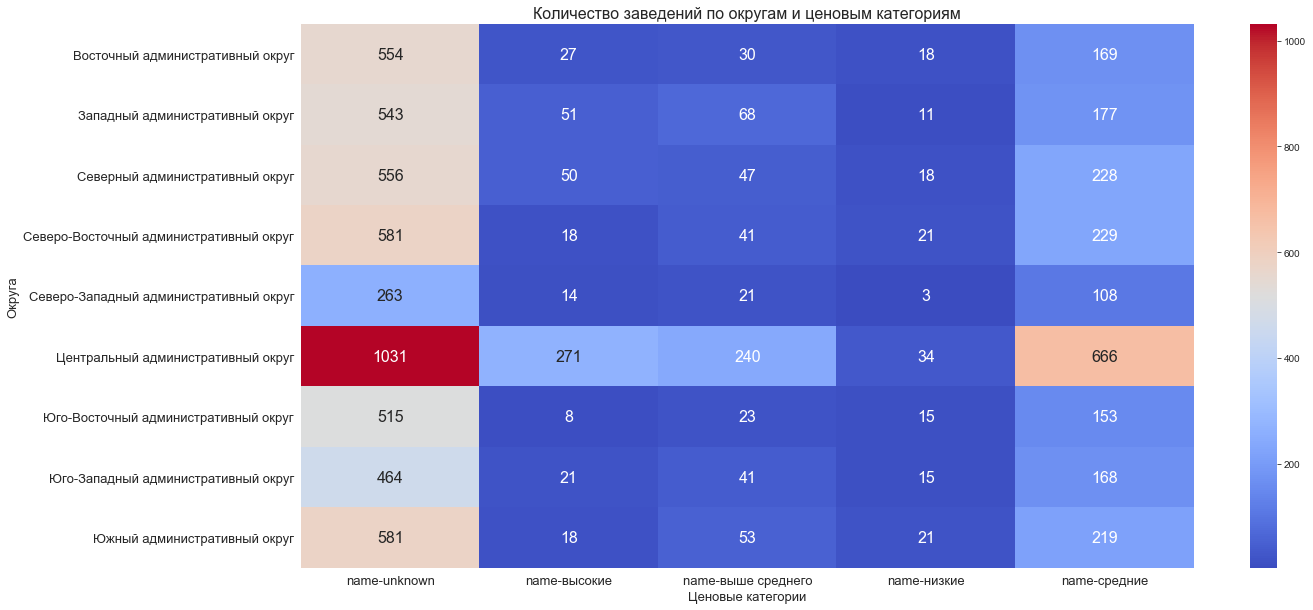

In [72]:
plt.figure(figsize=(20, 10))
sns.heatmap(data=distr_and_price, cmap='coolwarm', annot=True, fmt='.0f', annot_kws={'fontsize': 16})
plt.tick_params(labelsize=13)
plt.title('Количество заведений по округам и ценовым категориям', fontsize=16)
plt.xlabel('Ценовые категории', fontsize=13)
plt.ylabel('Округа', fontsize=13)
plt.show()

**Наблюдаем:**
- медианные чеки в разных округах разнятс в разы: от 450 руб. в ЮВАО до 1 000 руб. в ЦАО и ЗАО;
- ЦАО и ЗАО - единственные округа, где медиана выше медианы по городу;
- такие отличия характерны не только для рынка общепита и объясняются особенностями города Москвы;
- на хитмэпе с ценовыми категориями заведений видим аналогчную картину;
- в целом разброс чеков очень большой: от 30 до 35 000 руб. -- слишком разные заведения в нашем сете.

### Топ-100 и Антитоп-100 заведений по рейтингам.

Здесь и далее:
- Топ-100 -- 100 заведений с наивысшими рейтингами;
- Антитоп-100 - 100 заведений с наименьшими рейтингами;
- все заведения отобраны случайно, простой сортировкой по величине рейтинга.

In [73]:
top_100 = data.sort_values(by='rating', ascending=False).head(100)
top_100_list = list(top_100['name'])

In [74]:
anti_top_100 = data.sort_values(by='rating').head(100)
anti_top_100_list = list(anti_top_100['name'])

In [75]:
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

In [76]:
def create_marker_top(row):
    icon_url = 'https://img.icons8.com/emoji/256/green-circle-emoji.png'  
    icon = CustomIcon(icon_url, icon_size=(30, 30))
    Marker([row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
        icon=icon
    ).add_to(m)

In [77]:
def create_marker_antitop(row):
    icon_url = 'https://img.icons8.com/emoji/256/red-circle-emoji.png'  
    icon = CustomIcon(icon_url, icon_size=(30, 30))
    Marker([row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
        icon=icon
    ).add_to(m)

In [78]:
#ТОП-100 зелёные; Антитоп-100 красные
top_100.apply(create_marker_top, axis=1)
anti_top_100.apply(create_marker_antitop, axis=1)

7629    None
5833    None
5808    None
1125    None
6757    None
        ... 
7202    None
525     None
3374    None
7843    None
1240    None
Length: 100, dtype: object

![](https://raw.githubusercontent.com/niksan-da/Portfolio/main/Catering_in_Moscow/git_1_4.png)

In [79]:
top_100_observe = (data.query('name in @top_100_list').
                   groupby('category', as_index=False).agg(counts=('name', 'count'),
                                                           med_bill=('middle_avg_bill', 'median'),
                                                           med_coffee=('middle_coffee_cup', 'median'),
                                                           in_chain=('chain', 'sum'),
                                                           all_time=('is_24/7', 'sum'),
                                                           med_seats=('seats', 'median')).
                   fillna(0).
                   sort_values(by='counts', ascending=False).
                   reset_index(drop=True)
                  )
top_100_observe

,category,counts,med_bill,med_coffee,in_chain,all_time,med_seats
0,кофейня,57,362.5,155.0,27,8,40.0
1,кафе,52,625.0,0.0,35,8,58.0
2,ресторан,24,900.0,0.0,14,2,120.0
3,пиццерия,16,600.0,0.0,12,0,100.0
4,"бар,паб",8,350.0,0.0,1,0,73.5
5,быстрое питание,7,400.0,140.0,2,0,86.0
6,столовая,5,0.0,0.0,3,1,50.0
7,булочная,3,375.0,0.0,2,0,25.0


In [80]:
anti_top_100_observe = (data.query('name in @anti_top_100_list').
                        groupby('category', as_index=False).agg(counts=('name', 'count'),
                                                                med_bill=('middle_avg_bill', 'median'),
                                                                med_coffee=('middle_coffee_cup', 'median'),
                                                                in_chain=('chain', 'sum'),
                                                                all_time=('is_24/7', 'sum'),
                                                                med_seats=('seats', 'median')).
                        fillna(0).
                        sort_values(by='counts', ascending=False).
                        reset_index(drop=True)
                       )
anti_top_100_observe

,category,counts,med_bill,med_coffee,in_chain,all_time,med_seats
0,кафе,272,387.5,0.0,71,40,45.5
1,кофейня,250,387.5,95.0,242,10,94.0
2,ресторан,115,1120.0,0.0,99,14,64.0
3,быстрое питание,78,300.0,0.0,33,27,51.0
4,столовая,12,305.0,0.0,3,1,100.0
5,"бар,паб",8,0.0,0.0,2,2,62.0
6,пиццерия,5,470.0,0.0,2,0,50.0
7,булочная,4,325.0,0.0,2,0,70.0


In [81]:
bill_compare = (categories[['category', 'med_bill']].
                merge(top_100_observe[['category', 'med_bill']], on='category', how='left').
                merge(anti_top_100_observe[['category', 'med_bill']], on='category', how='left')
               )
bill_compare.columns=('category', 'all', 'top_100', 'anti_top_100')
bill_compare

,category,all,top_100,anti_top_100
0,кафе,550.0,625.0,387.5
1,ресторан,1250.0,900.0,1120.0
2,кофейня,400.0,362.5,387.5
3,"бар,паб",1250.0,350.0,0.0
4,пиццерия,600.0,600.0,470.0
5,быстрое питание,375.0,400.0,300.0
6,столовая,300.0,0.0,305.0
7,булочная,450.0,375.0,325.0


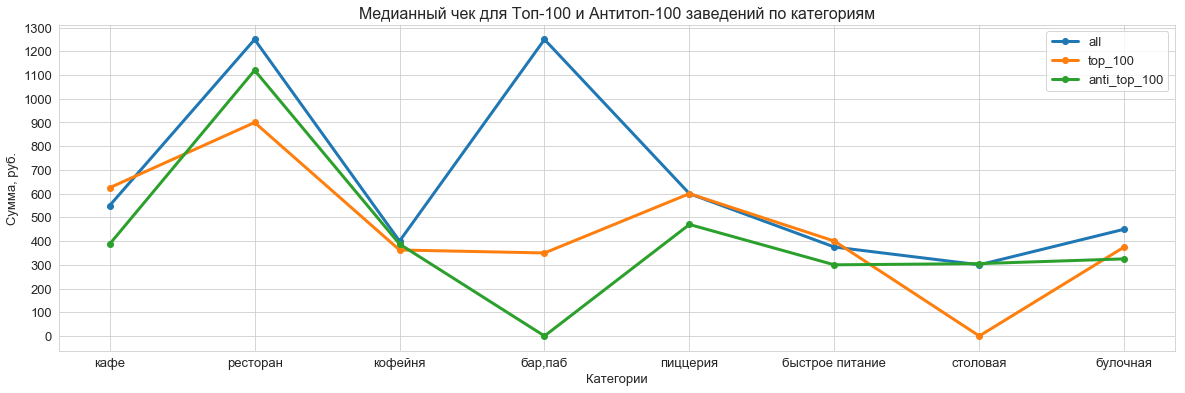

In [82]:
plt.figure(figsize=(20, 6))
ax = plt.subplot()
x=bill_compare['category']
y1=bill_compare['all']
y2=bill_compare['top_100']
y3=bill_compare['anti_top_100']
plt.plot(x, y1, label='all', lw=3, marker='o')
plt.plot(x, y2, label='top_100', lw=3, marker='o')
plt.plot(x, y3, label='anti_top_100', lw=3, marker='o')
ax.yaxis.set_major_locator(MultipleLocator(base=100))
plt.tick_params(labelsize=13)
plt.title('Медианный чек для Топ-100 и Антитоп-100 заведений по категориям', fontsize=16)
plt.xlabel('Категории', fontsize=13)
plt.ylabel('Сумма, руб.', fontsize=13)

plt.legend(fontsize=13)
plt.show()

**Наблюдаем:**
- в Топ-100 по рейтингу: кофейни, относительно недорогие кафе и рестораны;
- в Антитоп-100: также кафе и кофейни, а также более дорогие рестораны;
- на местности обе группы распредлены сходно: однако в центре преобладают заведения из Топ-100, Антитопво больше за пределами МКАД, существуют "несчастливые" районы со скоплениями антитопов;
- интересно влияние среднего чека на попадание в Топ или Антитоп: для кофеен медианы чеков очень близки (на рейтинг влияет не цена кофе), для баров и пабов Топовые заведения в среднем дешевле, чем все бары вообще, для ресторана средний чек Топ-100 тоже ниже (посетителям нравятся дешёвые рестораны и бары).

**Промежуточные выводы:**
- среди категорий лидируют по количеству заведений кафе, рестораны и кофейни;
- в лидерах по медиане чека пабы, бары и рестораны, наименьший чек -- в заведениях бысторого питания и столовых;
- примерно 3/4 всех сетевых заведений -- это кафе, рестораны и кофейни;
- среди всех сетевых наибольшие доли от всех сетевых у кафе, ресторанов и заведений быстрого питания;
- преобладают заведения среднего размера (около 50 мест);
- существуют большие и очень большие заведения (более 1000 мест); вероятно, это ресторнаы с банкетными залами;
- количество мест примерно одинаково распределено для сетевых/не сетевых заведений и круглосуточных/не круглосуточных заведений; - отличие наблюдаем только у круглосуточных: количество малых там примерно равно количеству средних;
- медианное значение по категориям: в лидерах рестораны (около 90), замыкают список булочные (около 50 мест);
- преобладают не сетевые заведения: их примерно в 1,5 раза больше сетевых;
- по категориям разделение неравномерное: от примерно 0,2 у баров до примерно 0,6 у булочных;
- сети преобладают в категориях, где технологии легко стандартизируются: в булочных, пиццериях, кофейнях;
- бары, пабы, кафе, напротив, чаще работают "в одиночку";
- рейтинги мало зависят от принадлежности к сети -- это видно из stripplot; исключение в кофейнях: низкие оценки чаще встречаются у сетевиков;
- Топ-15 сетей различаются по многим параметрам;
- прежде всего, разнятся объёмы сетей: от 120 заведений у лидера "Шоколадница" до 27 у 15-го места "Му-Му";
- большинство заведений в Топ-15 -- это кофейни;
- рестораны, которые в целом скорее не сетевые, в Топ-15 представлены 186 заведениями: ресторан или не сетевой, или входит в большую сеть, что можно объяснить технологическими особенностями;
- бары и столовые слабо представлены в Топ-15;
- многие сети известны за пределами Москвы;
- Топ-15 объединяет широкая география: они работают по всему городу;
- также сходны медианные рейтинги в районе 4.2-4.3;
- в лидерах по числу заведений ЦАО, САО и ЮАО; при этом ЦАО лидирует с большим отрывом;
- в ЦАО же наибольшее количество ресторанов;
- СЗАО, напротив, в аутсайдерах: всего около 400 заведений;
- рейтинги во всех категориях колеблются от 1.0 до 5.0: сказывается субъективность потребителей;
- при этом медианный и средний рейтинги в разных категориях почти идентичны: покупатели не "любят", например, кафе только за то, что они -- кафе;
- медианный рейтинг по округам отличается несущественно;
- на карте распределение выглядит равномерным: заведения "размазаны" по всей территории города;
- в большинстве категорий медианный рейтинг выше медианного по городу; в отстающих только столовые, кафе и фаст-фуд;
- в Топ-15 улиц - большие вылетные магистрали или МКАД;
- улицы с большим трафиком, они несут как "основательные" рестораны, кафе, так и "быстрые" фаст-фуд, кофейни, пиццерии;
- показатели заведений на улицах с единственным объектом походят на общие показатели по городу; такое единственное заведение может находиться, например, на маленькой улице в центре, что обеспечит ему выскою проходимость и конкуренцию с иными такими же заведениями; "один на улице" -- не значит, "монополист на улице";
- медианные чеки в разных округах разнятс в разы: от 450 руб. в ЮВАО до 1 000 руб. в ЦАО и ЗАО;
- ЦАО и ЗАО - единственные округа, где медиана выше медианы по городу;
- такие отличия характерны не только для рынка общепита и объясняются особенностями города Москвы;
- на хитмэпе с ценовыми категориями заведений видим аналогчную картину;
- в целом разброс чеков очень большой: от 30 до 35 000 руб. -- слишком разные заведения в нашем сете;
- в Топ-100 по рейтингу: кофейни, относительно недорогие кафе и рестораны;
- в Антитоп-100: также кафе и кофейни, а также более дорогие рестораны;
- на местности обе группы распредлены сходно: однако в центре преобладают заведения из Топ-100, Антитопво больше за пределами МКАД, существуют "несчастливые" районы со скоплениями антитопов;
- интересно влияние среднего чека на попадание в Топ или Антитоп: для кофеен медианы чеков очень близки (на рейтинг влияет не цена кофе), для баров и пабов Топовые заведения в среднем дешевле, чем все бары вообще, для ресторана средний чек Топ-100 тоже ниже (посетителям нравятся дешёвые рестораны и бары).

---

## Часть 3. Открытие кофейни.

Будем считать, что принципиально открытие новой кофейни в Москве возможно:
- размеры рынка велики,
- данных о насыщении рынка в нашем распоряжении нет.

При этом для принятия решения об открытии нужно определить: место расположения, средний чек, размер заведения.

Будем считать, что `rating` -- целевая переменная, мерило успеха кофейни.

In [83]:
data_coffee = data.query('category == "кофейня"').copy()

In [84]:
x = data_coffee.shape[0]
y = data_coffee.shape[0] / data.shape[0]
print(f'В сете данные о {x} кофейнях. Это {y:.2%} от общего количества заведений.')

В сете данные о 1413 кофейнях. Это 16.82% от общего количества заведений.


### Расположение кофеен.

In [85]:
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

In [86]:
def create_clusters_coffee(row):
    icon_url = 'https://img.icons8.com/ios-glyphs/256/coffee.png'  
    icon = CustomIcon(icon_url, icon_size=(30, 30))
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
        icon=icon,
    ).add_to(marker_cluster)

In [87]:
marker_cluster = MarkerCluster().add_to(m)
data_coffee.apply(create_clusters_coffee, axis=1)

3       None
25      None
45      None
46      None
52      None
        ... 
8356    None
8365    None
8376    None
8385    None
8400    None
Length: 1413, dtype: object

![](https://raw.githubusercontent.com/niksan-da/Portfolio/main/Catering_in_Moscow/git_1_5.png)

In [88]:
coffee_distr = (data_coffee.groupby('district', as_index=False).agg(counts=('name', 'count')).
                sort_values(by='counts', ascending=False).
                fillna(0).
                reset_index(drop=True)
               )
coffee_distr

,district,counts
0,Центральный административный округ,428
1,Северный административный округ,193
2,Северо-Восточный административный округ,159
3,Западный административный округ,150
4,Южный административный округ,131
5,Восточный административный округ,105
6,Юго-Западный административный округ,96
7,Юго-Восточный административный округ,89
8,Северо-Западный административный округ,62


**Наблюдаем:**
- кофейни распределены по всей территории Москвы;
- они располагаются вдоль крупных улиц;
- основной кластер - в ЦАО и САО - деловом центре столицы;
- кофеен практически нет в парках и лесопарках, а также вдоль МКАД;
- вероятно, стоит выбрать место в "середине списка": ЮАО или ВАО.

### Режим работы кофеен.

In [89]:
data_coffee.groupby('is_24/7')['name'].count()

is_24/7
False    1354
True       59
Name: name, dtype: int64

In [90]:
data_coffee.groupby('district', as_index=False)['is_24/7'].mean().\
sort_values(by='is_24/7', ascending=False).\
style.format({'is_24/7':'{:.2%}'})

,district,is_24/7
7,Юго-Западный административный округ,7.29%
5,Центральный административный округ,6.07%
1,Западный административный округ,6.00%
0,Восточный административный округ,4.76%
4,Северо-Западный административный округ,3.23%
2,Северный административный округ,2.59%
3,Северо-Восточный административный округ,1.89%
6,Юго-Восточный административный округ,1.12%
8,Южный административный округ,0.76%


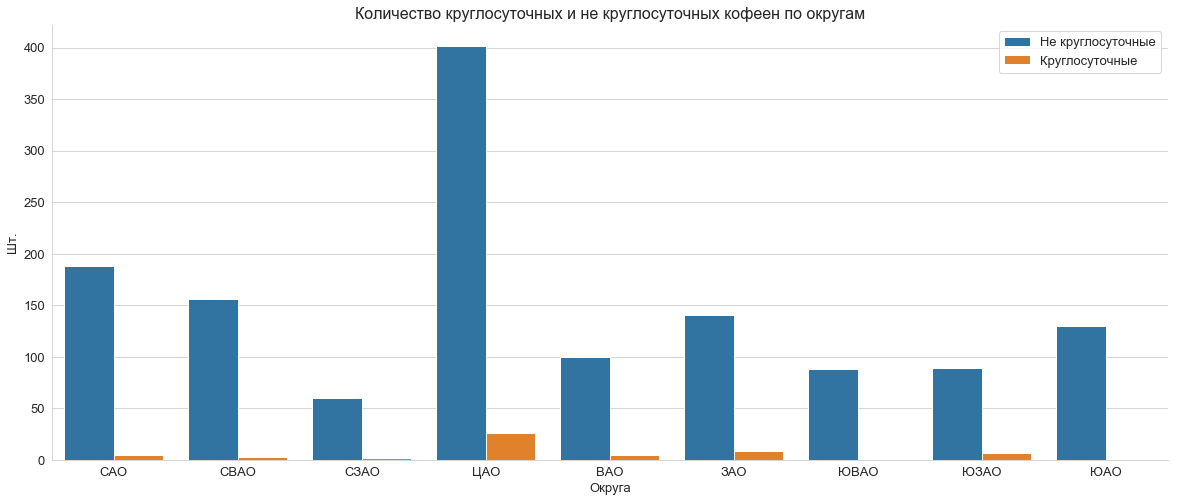

In [91]:
plt.figure(figsize=(20, 8))
sns.countplot(x='district', data=data_coffee, hue='is_24/7')
plt.tick_params(labelsize=13)
x_tiks = ['САО', 'СВАО', 'СЗАО', 'ЦАО', 'ВАО', 'ЗАО', 'ЮВАО', 'ЮЗАО', 'ЮАО']
plt.xticks(np.arange(9), x_tiks)
plt.title('Количество круглосуточных и не круглосуточных кофеен по округам', fontsize=16)
plt.xlabel('Округа', fontsize=13)
plt.ylabel('Шт.', fontsize=13)
plt.legend(['Не круглосуточные', 'Круглосуточные'], fontsize=13)
plt.gca().spines['top'].set_alpha(0.0)    
plt.gca().spines['bottom'].set_alpha(1)
plt.gca().spines['right'].set_alpha(0.0)
plt.gca().spines['left'].set_alpha(1)
plt.show()

**Наблюдаем:**
- крулосуточных кофеен мало: их всего около 4 % от общего числа кофеен и около 0,7 % от общего числа заведений;
- круглосуточные кофейни сконцентрированы в ЮЗАО, ЦАО, ЗАО;
- в ЮВАО и ЮАО их нет вообще;
- при этом весьма вероятно, что малое число круглосуточных кофеен обусловлено низким спросом на кофе в ночное время;
- вероятно, стоит открыть не круглосуточную кофейню.

### Рейтинги, цены и размеры кофеен.

In [92]:
distr_rating_coffee = (data_coffee.groupby('district', as_index=False).agg(med_rating=('rating', 'median'),
                                                                           med_cup=('middle_coffee_cup', 'median')).
                       sort_values(by='med_rating', ascending=False).
                       fillna(0).
                       reset_index(drop=True)
                      )
distr_rating_coffee

,district,med_rating,med_cup
0,Восточный административный округ,4.3,135.0
1,Северный административный округ,4.3,159.0
2,Северо-Восточный административный округ,4.3,162.5
3,Северо-Западный административный округ,4.3,165.0
4,Центральный административный округ,4.3,190.0
5,Юго-Восточный административный округ,4.3,147.5
6,Юго-Западный административный округ,4.3,198.0
7,Южный административный округ,4.3,150.0
8,Западный административный округ,4.2,189.0


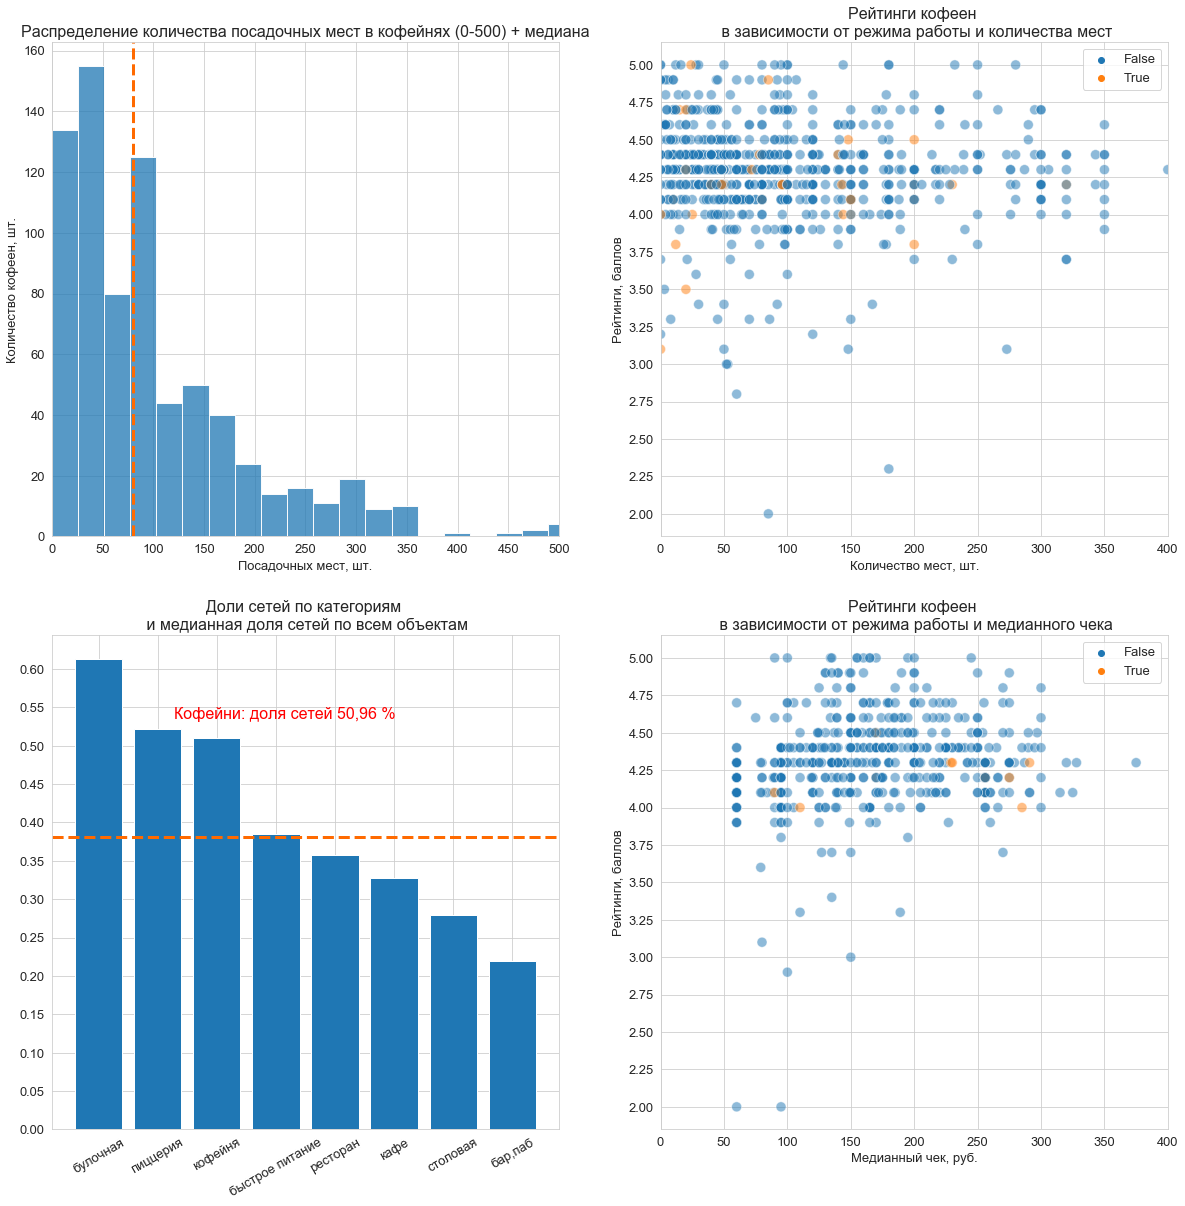

In [93]:
plt.figure(figsize=(20, 20))

ax1 = plt.subplot(2, 2, 1)
ax1 = sns.histplot(x='seats', data=data_coffee, bins=50, kde=False, stat='count')
xv = data_coffee['seats'].median()
ax1.axvline(x=xv, color='#FF6A00', lw=3, linestyle='--')
ax1.set_xlim(0, 500)
ax1.set_title('Распределение количества посадочных мест в кофейнях (0-500) + медиана', fontsize=16)
ax1.tick_params(labelsize=13)
ax1.xaxis.set_major_locator(MultipleLocator(base=50))
ax1.set_xlabel('Посадочных мест, шт.', fontsize=13)
ax1.set_ylabel('Количество кофеен, шт.', fontsize=13)

ax2 = plt.subplot(2, 2, 2)
ax2 = sns.scatterplot(x='seats', y='rating', data=data_coffee, hue='is_24/7', s=100, alpha=0.5)
ax2.set_xlim(0, 400)
ax2.yaxis.set_major_locator(MultipleLocator(base=0.25))
ax2.tick_params(labelsize=13)
plt.title('Рейтинги кофеен \n в зависимости от режима работы и количества мест', fontsize=16)
ax2.set_xlabel('Количество мест, шт.', fontsize=13)
ax2.set_ylabel('Рейтинги, баллов', fontsize=13)
ax2.legend(fontsize=13)

#ранее уже приводился, приводится повторно
ax3 = plt.subplot(2, 2, 3)
x3 = categories_chains['category']
height3 = categories_chains['chain_share']
ax3.bar(x3, height3, width=0.8)
yh = data['chain'].mean()
ax3.axhline(y=yh, color='#FF6A00', lw=3, linestyle='--')
ax3.set_title('Доли сетей по категориям \n и медианная доля сетей по всем объектам', fontsize=16)
ax3.tick_params(labelsize=13)
ax3.yaxis.set_major_locator(MultipleLocator(base=0.05))
plt.xticks(rotation=30)
plt.figtext(0.21, 0.41, 'Кофейни: доля сетей 50,96 %', size=16, color='red')

ax4 = plt.subplot(2, 2, 4)
ax4 = sns.scatterplot(x='middle_coffee_cup', y='rating', data=data_coffee, hue='is_24/7', s=100, alpha=0.5)
ax4.set_xlim(0, 400)
ax4.yaxis.set_major_locator(MultipleLocator(base=0.25))
ax4.tick_params(labelsize=13)
plt.title('Рейтинги кофеен \n в зависимости от режима работы и медианного чека', fontsize=16)
ax4.set_xlabel('Медианный чек, руб.', fontsize=13)
ax4.set_ylabel('Рейтинги, баллов', fontsize=13)
ax4.legend(fontsize=13)

plt.show()

**Наблюдаем:**
- медианные рейтинги по округам примерно одинаковые: около 4.3;
- чашка кофе стоит от 150 руб. до 190 руб.;
- при этом чек в пределах 100-300 руб. мало влияет на рейтинги: так, например, при цене чашки в 150 руб. можно лучить рейтинг 3.0 или 5.0;
- низкие рейтинги -- в основном в области низких чеков; вероятно, пытаться сэкономить и удерживать цену на этом уровне не стоит;
- вероятно, при открытии стоит ориентироваться на медиану в округе: 150 руб. для более "низких" округов, 190-200 руб. -- в ЦАО;
- количество посадочных мест распределено примерно так же, как и по всем объектам города; однако в отличие от ресторанов большие кофейни встречаются реже;
- зависимость рейтинга от количества мест не прослеживается;
- вероятно, стоит ориентироваться на 20-30 мест.

**Промежуточные выводы:**
- в сете данные о 1413 кофейнях. Это 16.81% от общего количества заведений;
- принципиально открытие новой кофейни в Москве возможно;
- кофейни распределены по всей территории Москвы;
- они располагаются вдоль крупных улиц;
- основной кластер - в ЦАО и САО - деловом центре столицы;
- кофеен практически нет в парках и лесопарках, а также вдоль МКАД;
- вероятно, стоит выбрать место в "середине списка": ЮАО или ВАО;
- крулосуточных кофеен мало: их всего около 4 % от общего числа кофеен и около 0,7 % от общего числа заведений;
- круглосуточные кофейни сконцентрированы в ЮЗАО, ЦАО, ЗАО;
- в ЮВАО и ЮАО их нет вообще;
- при этом весьма вероятно, что малое число круглосуточных кофеен обусловлено низким спросом на кофе в ночное время;
- вероятно, стоит открыть не круглосуточную кофейню;
- медианные рейтинги по округам примерно одинаковые: около 4.3;
- чашка кофе стоит от 150 руб. до 190 руб.;
- при этом чек в пределах 100-300 руб. мало влияет на рейтинги: так, например, при цене чашки в 150 руб. можно лучить рейтинг 3.0 или 5.0;
- низкие рейтинги -- в основном в области низких чеков; вероятно, пытаться сэкономить и удерживать цену на этом уровне не стоит;
- вероятно, при открытии стоит ориентироваться на медиану в округе: 150 руб. для более "низких" округов, 190-200 руб. -- в ЦАО;
- количество посадочных мест распределено примерно так же, как и по всем объектам города; однако в отличие от ресторанов большие кофейни встречаются реже;
- зависимость рейтинга от количества мест не прослеживается;
- вероятно, стоит ориентироваться на 20-30 мест.

---

## Общие выводы.

- исследование проведено на основе данных о 8406 заведениях в городе Москве по состоянию на лето 2022 года;
- данные соответствуют описанию;
- в данные были внесены незначительные коррективы: заполнены пропуски в `price`;
- данные дополнены: название улицы `street` и режим работы `is_24/7`;
- среди категорий лидируют по количеству заведений кафе, рестораны и кофейни;
- в лидерах по медиане чека пабы, бары и рестораны, наименьший чек -- в заведениях быстрого питания и столовых;
- примерно 3/4 всех сетевых заведений -- это кафе, рестораны и кофейни;
- среди всех сетевых наибольшие доли от всех сетевых у кафе, ресторанов и заведений быстрого питания;
- преобладают заведения среднего размера (около 50 мест);
- существуют большие и очень большие заведения (более 1000 мест); вероятно, это рестораны с банкетными залами;
- количество мест примерно одинаково распределено для сетевых/не сетевых заведений и круглосуточных/не круглосуточных заведений; - отличие наблюдаем только у круглосуточных: количество малых там примерно равно количеству средних;
- медианное значение по категориям: в лидерах рестораны (около 90), замыкают список булочные (около 50 мест);
- преобладают не сетевые заведения: их примерно в 1.5 раза больше сетевых;
- по категориям разделение неравномерное: от примерно 0.2 у баров до примерно 0.6 у булочных;
- сети преобладают в категориях, где технологии легко стандартизируются: в булочных, пиццериях, кофейнях;
- бары, пабы, кафе, напротив, чаще работают "в одиночку";
- рейтинги мало зависят от принадлежности к сети -- это видно из stripplot; исключение в кофейнях: низкие оценки чаще встречаются у сетевиков;
- Топ-15 сетей различаются по многим параметрам;
- прежде всего, разнятся объёмы сетей: от 120 заведений у лидера "Шоколадница" до 27 у 15-го места "Му-Му";
- большинство заведений в Топ-15 -- это кофейни;
- рестораны, которые в целом скорее не сетевые, в Топ-15 представлены 186 заведениями: ресторан или не сетевой, или входит в большую сеть, что можно объяснить технологическими особенностями;
- бары и столовые слабо представлены в Топ-15;
- многие сети известны за пределами Москвы;
- Топ-15 объединяет широкая география: они работают по всему городу;
- также сходны медианные рейтинги в районе 4.2-4.3;
- в лидерах по числу заведений ЦАО, САО и ЮАО; при этом ЦАО лидирует с большим отрывом;
- в ЦАО же наибольшее количество ресторанов;
- СЗАО, напротив, в аутсайдерах: всего около 400 заведений;
- рейтинги во всех категориях колеблются от 1.0 до 5.0: сказывается субъективность потребителей;
- при этом медианный и средний рейтинги в разных категориях почти идентичны: покупатели не "любят", например, кафе только за то, что они -- кафе;
- медианный рейтинг по округам отличается несущественно;
- на карте распределение выглядит равномерным: заведения "размазаны" по всей территории города;
- в большинстве категорий медианный рейтинг выше медианного по городу; в отстающих только столовые, кафе и фаст-фуд;
- в Топ-15 улиц - большие вылетные магистрали или МКАД;
- улицы с большим трафиком, они несут как "основательные" рестораны, кафе, так и "быстрые" фаст-фуд, кофейни, пиццерии;
- показатели заведений на улицах с единственным объектом походят на общие показатели по городу; такое единственное заведение может находиться, например, на маленькой улице в центре, что обеспечит ему высокую проходимость и конкуренцию с иными такими же заведениями; "один на улице" -- не значит, "монополист на улице";
- медианные чеки в разных округах разнятся в разы: от 450 руб. в ЮВАО до 1 000 руб. в ЦАО и ЗАО;
- ЦАО и ЗАО - единственные округа, где медиана выше медианы по городу;
- такие отличия характерны не только для рынка общепита и объясняются особенностями города Москвы;
- на хитмэпе с ценовыми категориями заведений видим аналогичную картину;
- в целом разброс чеков очень большой: от 30 до 35 000 руб. -- слишком разные заведения в нашем сете;
- в Топ-100 по рейтингу: кофейни, относительно недорогие кафе и рестораны;
- в Антитоп-100: также кафе и кофейни, а также более дорогие рестораны;
- на местности обе группы распределены сходно: однако в центре преобладают заведения из Топ-100, Антитопов больше за пределами МКАД, существуют "несчастливые" районы со скоплениями антитопов;
- интересно влияние среднего чека на попадание в Топ или Антитоп: для кофеен медианы чеков очень близки (на рейтинг влияет не цена кофе), для баров и пабов Топовые заведения в среднем дешевле, чем все бары вообще, для ресторана средний чек Топ-100 тоже ниже (посетителям нравятся дешёвые рестораны и бары);
- в сете данные о 1413 кофейнях; это 16.81 % от общего количества заведений;
- принципиально открытие новой кофейни в Москве возможно;
- кофейни распределены по всей территории Москвы;
- они располагаются вдоль крупных улиц;
- основной кластер - в ЦАО и САО - деловом центре столицы;
- кофеен практически нет в парках и лесопарках, а также вдоль МКАД;
- вероятно, стоит выбрать место в "середине списка": ЮАО или ВАО;
- круглосуточных кофеен мало: их всего около 4 % от общего числа кофеен и около 0.7 % от общего числа заведений;
- круглосуточные кофейни сконцентрированы в ЮЗАО, ЦАО, ЗАО;
- в ЮВАО и ЮАО их нет вообще;
- при этом весьма вероятно, что малое число круглосуточных кофеен обусловлено низким спросом на кофе в ночное время;
- вероятно, стоит открыть не круглосуточную кофейню;
- медианные рейтинги по округам примерно одинаковые: около 4.3;
- чашка кофе стоит от 150 руб. до 190 руб.;
- при этом чек в пределах 100-300 руб. мало влияет на рейтинги: так, например, при цене чашки в 150 руб. можно лучить рейтинг 3.0 или 5.0;
- низкие рейтинги -- в основном в области низких чеков; вероятно, пытаться сэкономить и удерживать цену на этом уровне не стоит;
- вероятно, при открытии стоит ориентироваться на медиану в округе: 150 руб. для более "низких" округов, 190-200 руб. -- в ЦАО;
- количество посадочных мест распределено примерно так же, как и по всем объектам города; однако в отличие от ресторанов большие кофейни встречаются реже;
- зависимость рейтинга от количества мест не прослеживается;
- вероятно, стоит ориентироваться на 20-30 мест.